In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

# Exploratory Data Analysis (EDA)

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Drop irrelevant column 'id'. 

In [5]:
df = df.drop('id',axis=1)

We are planning to use MinMaxScaler for scaling. This scaling converts maximum value to 1 and minimum to 0 and distribute the values. Column 'zipcode' is not suitable to be applied to this scaler so we will drop it. 

In [6]:
df = df.drop('zipcode', axis = 1)

Check the columns with null values.

In [7]:
df.waterfront.value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [8]:
df.view.value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [9]:
df.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

We cannot find the strong correlation with the price for those columns because they have more than 80% of the rows with same value. Therefore, we will drop the columns above.

In [10]:
df = df.drop(columns=['waterfront', 'view', 'yr_renovated'])

## Feature Engineering

In [11]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,Average,7 Average,1180,0.0,1955,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,Average,7 Average,2170,400.0,1951,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,Average,6 Low Average,770,0.0,1933,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,Very Good,7 Average,1050,910.0,1965,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,Average,8 Good,1680,0.0,1987,47.6168,-122.045,1800,7503


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   condition      21597 non-null  object 
 8   grade          21597 non-null  object 
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  object 
 11  yr_built       21597 non-null  int64  
 12  lat            21597 non-null  float64
 13  long           21597 non-null  float64
 14  sqft_living15  21597 non-null  int64  
 15  sqft_lot15     21597 non-null  int64  
dtypes: float64(5), int64(7), object(4)
memory usage: 2.6+ MB


Lets deal with the columns with object data type and convert them into int64 or float64 to pass it into keras model. Columns we will make a change are:
- date
- condition
- grade
- sqft_basement

Convert column 'date' into new columns 'month' and 'year'. After creating new columns, 'date' column is not needed so it can be dropped.

In [13]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)
df = df.drop('date',axis=1)

Columns 'condition' and 'grade' has object entries. We will create the dictionary listing the original entries and the number entries that corresponds to the original entries. Then, we will replace the values in that column using the dictionary we created.

In [14]:
df.condition.value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [15]:
condition_replace = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}
df["condition"].replace(condition_replace, inplace=True)

In [16]:
df.grade.value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [17]:
grade_replace = {'3 Poor': 3, '4 Low': 4, '5 Fair': 5, '6 Low Average': 6, 
                 '7 Average': 7, '8 Good': 8, '9 Better': 9 ,'10 Very Good': 10, 
                 '11 Excellent':11, '12 Luxury': 12, '13 Mansion': 13}
df["grade"].replace(grade_replace, inplace=True)

Lastly, we will convert the data type of 'sqft basement' into int64 or float64. Lets first check the values.

In [18]:
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
4820.0        1
1770.0        1
2300.0        1
768.0         1
1008.0        1
Name: sqft_basement, Length: 304, dtype: int64

There is a value '?' which will prevent us from converting the data type. We will replace the '?' to 0 and then convert the data type.

In [19]:
df['sqft_basement'].replace({'?': 0},inplace = True)

In [20]:
df['sqft_basement'] = df['sqft_basement'].astype('float64')

Lets check if every change has been made properly.

In [21]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,47.6168,-122.045,1800,7503,2,2015


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   condition      21597 non-null  int64  
 7   grade          21597 non-null  int64  
 8   sqft_above     21597 non-null  int64  
 9   sqft_basement  21597 non-null  float64
 10  yr_built       21597 non-null  int64  
 11  lat            21597 non-null  float64
 12  long           21597 non-null  float64
 13  sqft_living15  21597 non-null  int64  
 14  sqft_lot15     21597 non-null  int64  
 15  month          21597 non-null  int64  
 16  year           21597 non-null  int64  
dtypes: float64(6), int64(11)
memory usage: 2.8 MB


GOOD! Now we have everything set. We will move on to next step.

# Train Test Split and Scaling

## Train Test Split

We will first set the X and y. y will be our target variable and the X will be the rest. In my phase 2 project from flatiron school, 'price' was our target object. Therefore, we will set 'price' as a target.

In [23]:
X = df.drop('price',axis=1)
y = df['price']

We will use the train test split from the scikit learn library. to split the X and y into train set and test set.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) 

Since the random_state is 42, the test result will change if we rerun the jupyter notebook.

## Scaling

Lets use MinMaxScaler from sklearn library to scale the X_train and X_test.

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

For scaling, fit applies only for train set while transform applies to both.

In [29]:
X_train = scaler.fit_transform(X_train)

In [30]:
X_test = scaler.transform(X_test)

In [31]:
X_val = scaler.transform(X_val)

In [32]:
X_train.shape

(11337, 16)

In [33]:
X_test.shape

(6480, 16)

In [34]:
X_val.shape

(3780, 16)

# Modeling

We will create a model using keras from tensorflow library.

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [36]:
def modeling():
    model = Sequential()
    model.add(Input(shape = (16,))) 
    model.add(Dense(16, activation = 'relu'))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dense(1))             
    model.compile(optimizer='adam',loss='mean_squared_error') 
    return model

In [37]:
model = modeling()

In [38]:
model.fit(X_train, y_train.values,
          validation_data=(X_val,y_val.values),
          epochs=500, batch_size=100)

Epoch 1/500
114/114 [==============================] - 0s 2ms/step - loss: 430354825216.0000 - val_loss: 427941527552.0000
Epoch 2/500
114/114 [==============================] - 0s 817us/step - loss: 430322745344.0000 - val_loss: 427874189312.0000
Epoch 3/500
114/114 [==============================] - 0s 773us/step - loss: 430196326400.0000 - val_loss: 427672403968.0000
Epoch 4/500
114/114 [==============================] - 0s 781us/step - loss: 429896269824.0000 - val_loss: 427258216448.0000
Epoch 5/500
114/114 [==============================] - 0s 799us/step - loss: 429357039616.0000 - val_loss: 426578149376.0000
Epoch 6/500
114/114 [==============================] - 0s 1ms/step - loss: 428526895104.0000 - val_loss: 425580888064.0000
Epoch 7/500
114/114 [==============================] - 0s 2ms/step - loss: 427361894400.0000 - val_loss: 424228257792.0000
Epoch 8/500
114/114 [==============================] - 0s 2ms/step - loss: 425822552064.0000 - val_loss: 422487293952.0000
Epoch 9/

114/114 [==============================] - 0s 781us/step - loss: 104585232384.0000 - val_loss: 101078892544.0000
Epoch 67/500
114/114 [==============================] - 0s 755us/step - loss: 104355659776.0000 - val_loss: 100853817344.0000
Epoch 68/500
114/114 [==============================] - 0s 729us/step - loss: 104137515008.0000 - val_loss: 100630683648.0000
Epoch 69/500
114/114 [==============================] - 0s 755us/step - loss: 103919992832.0000 - val_loss: 100423532544.0000
Epoch 70/500
114/114 [==============================] - 0s 738us/step - loss: 103706501120.0000 - val_loss: 100206198784.0000
Epoch 71/500
114/114 [==============================] - 0s 764us/step - loss: 103496654848.0000 - val_loss: 99996164096.0000
Epoch 72/500
114/114 [==============================] - 0s 755us/step - loss: 103275962368.0000 - val_loss: 99775070208.0000
Epoch 73/500
114/114 [==============================] - 0s 746us/step - loss: 103056957440.0000 - val_loss: 99553542144.0000
Epoch 74

Epoch 132/500
114/114 [==============================] - 0s 2ms/step - loss: 86226296832.0000 - val_loss: 82685059072.0000
Epoch 133/500
114/114 [==============================] - 0s 773us/step - loss: 85897158656.0000 - val_loss: 82356420608.0000
Epoch 134/500
114/114 [==============================] - 0s 746us/step - loss: 85571788800.0000 - val_loss: 82023505920.0000
Epoch 135/500
114/114 [==============================] - 0s 773us/step - loss: 85257224192.0000 - val_loss: 81701216256.0000
Epoch 136/500
114/114 [==============================] - 0s 799us/step - loss: 84912046080.0000 - val_loss: 81366818816.0000
Epoch 137/500
114/114 [==============================] - 0s 738us/step - loss: 84584554496.0000 - val_loss: 81041645568.0000
Epoch 138/500
114/114 [==============================] - 0s 773us/step - loss: 84256587776.0000 - val_loss: 80712335360.0000
Epoch 139/500
114/114 [==============================] - 0s 799us/step - loss: 83933814784.0000 - val_loss: 80379338752.0000
Ep

114/114 [==============================] - 0s 755us/step - loss: 64880644096.0000 - val_loss: 61342662656.0000
Epoch 198/500
114/114 [==============================] - 0s 755us/step - loss: 64592887808.0000 - val_loss: 61052518400.0000
Epoch 199/500
114/114 [==============================] - 0s 799us/step - loss: 64303001600.0000 - val_loss: 60770336768.0000
Epoch 200/500
114/114 [==============================] - 0s 817us/step - loss: 64023638016.0000 - val_loss: 60483235840.0000
Epoch 201/500
114/114 [==============================] - 0s 834us/step - loss: 63734792192.0000 - val_loss: 60214341632.0000
Epoch 202/500
114/114 [==============================] - 0s 764us/step - loss: 63461117952.0000 - val_loss: 59934851072.0000
Epoch 203/500
114/114 [==============================] - 0s 755us/step - loss: 63190130688.0000 - val_loss: 59665219584.0000
Epoch 204/500
114/114 [==============================] - 0s 746us/step - loss: 62919032832.0000 - val_loss: 59400814592.0000
Epoch 205/500


114/114 [==============================] - 0s 1ms/step - loss: 53465370624.0000 - val_loss: 50204733440.0000
Epoch 263/500
114/114 [==============================] - 0s 755us/step - loss: 53389611008.0000 - val_loss: 50136952832.0000
Epoch 264/500
114/114 [==============================] - 0s 781us/step - loss: 53318713344.0000 - val_loss: 50074152960.0000
Epoch 265/500
114/114 [==============================] - 0s 755us/step - loss: 53245493248.0000 - val_loss: 50008346624.0000
Epoch 266/500
114/114 [==============================] - 0s 755us/step - loss: 53179314176.0000 - val_loss: 49946353664.0000
Epoch 267/500
114/114 [==============================] - 0s 1ms/step - loss: 53113237504.0000 - val_loss: 49888751616.0000
Epoch 268/500
114/114 [==============================] - 0s 939us/step - loss: 53046759424.0000 - val_loss: 49824075776.0000
Epoch 269/500
114/114 [==============================] - 0s 755us/step - loss: 52985593856.0000 - val_loss: 49766985728.0000
Epoch 270/500
114/

114/114 [==============================] - 0s 729us/step - loss: 50731630592.0000 - val_loss: 47744983040.0000
Epoch 328/500
114/114 [==============================] - 0s 773us/step - loss: 50700898304.0000 - val_loss: 47717584896.0000
Epoch 329/500
114/114 [==============================] - 0s 1ms/step - loss: 50677321728.0000 - val_loss: 47701868544.0000
Epoch 330/500
114/114 [==============================] - 0s 834us/step - loss: 50656432128.0000 - val_loss: 47674826752.0000
Epoch 331/500
114/114 [==============================] - 0s 764us/step - loss: 50627211264.0000 - val_loss: 47659520000.0000
Epoch 332/500
114/114 [==============================] - 0s 738us/step - loss: 50603491328.0000 - val_loss: 47637626880.0000
Epoch 333/500
114/114 [==============================] - 0s 746us/step - loss: 50586996736.0000 - val_loss: 47612088320.0000
Epoch 334/500
114/114 [==============================] - 0s 755us/step - loss: 50555641856.0000 - val_loss: 47590465536.0000
Epoch 335/500
11

114/114 [==============================] - 0s 764us/step - loss: 49407143936.0000 - val_loss: 46607294464.0000
Epoch 393/500
114/114 [==============================] - 0s 738us/step - loss: 49390006272.0000 - val_loss: 46591832064.0000
Epoch 394/500
114/114 [==============================] - 0s 746us/step - loss: 49372053504.0000 - val_loss: 46577074176.0000
Epoch 395/500
114/114 [==============================] - 0s 738us/step - loss: 49360687104.0000 - val_loss: 46561280000.0000
Epoch 396/500
114/114 [==============================] - 0s 738us/step - loss: 49338961920.0000 - val_loss: 46558281728.0000
Epoch 397/500
114/114 [==============================] - 0s 860us/step - loss: 49326039040.0000 - val_loss: 46544982016.0000
Epoch 398/500
114/114 [==============================] - 0s 878us/step - loss: 49307639808.0000 - val_loss: 46522298368.0000
Epoch 399/500
114/114 [==============================] - 0s 738us/step - loss: 49294323712.0000 - val_loss: 46511931392.0000
Epoch 400/500


114/114 [==============================] - 0s 808us/step - loss: 48483717120.0000 - val_loss: 45824929792.0000
Epoch 458/500
114/114 [==============================] - 0s 781us/step - loss: 48472076288.0000 - val_loss: 45815328768.0000
Epoch 459/500
114/114 [==============================] - 0s 746us/step - loss: 48460787712.0000 - val_loss: 45804978176.0000
Epoch 460/500
114/114 [==============================] - 0s 729us/step - loss: 48451940352.0000 - val_loss: 45785116672.0000
Epoch 461/500
114/114 [==============================] - 0s 738us/step - loss: 48438181888.0000 - val_loss: 45784428544.0000
Epoch 462/500
114/114 [==============================] - 0s 764us/step - loss: 48424374272.0000 - val_loss: 45775556608.0000
Epoch 463/500
114/114 [==============================] - 0s 755us/step - loss: 48418078720.0000 - val_loss: 45763698688.0000
Epoch 464/500
114/114 [==============================] - 0s 746us/step - loss: 48403783680.0000 - val_loss: 45751635968.0000
Epoch 465/500


If you are planning to conduct multiple training, defining a function for creating a model will be useful.

In [39]:
loss = pd.DataFrame(model.history.history)
loss

,loss,val_loss
0,4.303548e+11,4.279415e+11
1,4.303227e+11,4.278742e+11
2,4.301963e+11,4.276724e+11
3,4.298963e+11,4.272582e+11
4,4.293570e+11,4.265781e+11
...,...,...
495,4.807131e+10,4.548090e+10
496,4.806164e+10,4.547643e+10
497,4.805688e+10,4.547066e+10
498,4.804209e+10,4.546062e+10


<AxesSubplot:>

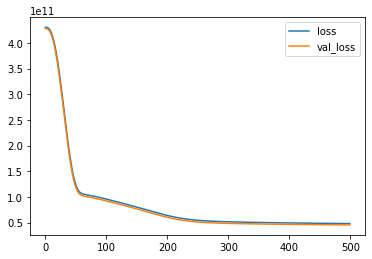

In [40]:
loss.plot()

Plot shows that our loss stabilizes around epoch = 300.

# Evaluate the model

We will first find out the mean absolute error.

In [41]:
from sklearn.metrics import mean_absolute_error, r2_score

Predict the price using the model we created using a X_test.

In [42]:
test_pred = model.predict(X_test) 

In [43]:
mean_absolute_error(y_test,test_pred)

134285.5068812959

MAE is the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight. This shows that our prediction has average difference of about $ 135000 from the actual price.

In [44]:
r2_score(y_test,test_pred)

0.6341836992031531

Our model has fair r2 score of around 0.63.

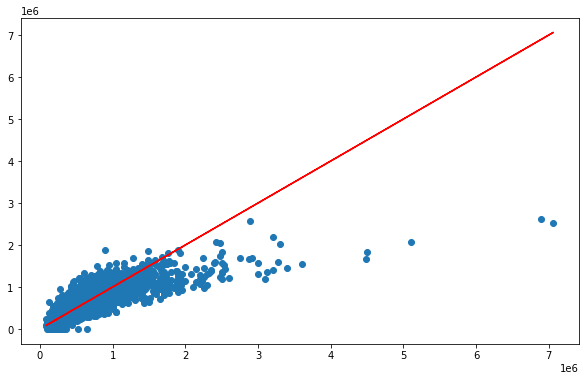

In [45]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_test, test_pred)
ax.plot(y_test,y_test,'r')

Plot shows that the there are outliers that does not follow the y_test line. Our scatter points are closely aligned with the linear line up to around 2e-6 to 3e-6.

# Just for fun

## Is more unit better?

Since I did not understand fully on choosing number of unit 

In [46]:
model = Sequential()
model.add(Input(shape = (16,))) 
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(1))             
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train, y_train.values,
          validation_data=(X_val,y_val.values),
          epochs=500, batch_size=100)


Epoch 1/500
114/114 [==============================] - 0s 2ms/step - loss: 430341324800.0000 - val_loss: 427887460352.0000
Epoch 2/500
114/114 [==============================] - 0s 887us/step - loss: 430104674304.0000 - val_loss: 427376345088.0000
Epoch 3/500
114/114 [==============================] - 0s 860us/step - loss: 429135659008.0000 - val_loss: 425834446848.0000
Epoch 4/500
114/114 [==============================] - 0s 887us/step - loss: 426884300800.0000 - val_loss: 422766706688.0000
Epoch 5/500
114/114 [==============================] - 0s 887us/step - loss: 422905577472.0000 - val_loss: 417765752832.0000
Epoch 6/500
114/114 [==============================] - 0s 878us/step - loss: 416837894144.0000 - val_loss: 410518093824.0000
Epoch 7/500
114/114 [==============================] - 0s 869us/step - loss: 408404623360.0000 - val_loss: 400796090368.0000
Epoch 8/500
114/114 [==============================] - 0s 887us/step - loss: 397417840640.0000 - val_loss: 388471488512.0000
Ep

114/114 [==============================] - 0s 852us/step - loss: 90622754816.0000 - val_loss: 86956646400.0000
Epoch 67/500
114/114 [==============================] - 0s 878us/step - loss: 90099343360.0000 - val_loss: 86428131328.0000
Epoch 68/500
114/114 [==============================] - 0s 860us/step - loss: 89580240896.0000 - val_loss: 85900959744.0000
Epoch 69/500
114/114 [==============================] - 0s 869us/step - loss: 89056714752.0000 - val_loss: 85372248064.0000
Epoch 70/500
114/114 [==============================] - 0s 852us/step - loss: 88516583424.0000 - val_loss: 84840726528.0000
Epoch 71/500
114/114 [==============================] - 0s 852us/step - loss: 87985848320.0000 - val_loss: 84294918144.0000
Epoch 72/500
114/114 [==============================] - 0s 869us/step - loss: 87436607488.0000 - val_loss: 83746177024.0000
Epoch 73/500
114/114 [==============================] - 0s 904us/step - loss: 86888366080.0000 - val_loss: 83210403840.0000
Epoch 74/500
114/114 

Epoch 132/500
114/114 [==============================] - 0s 878us/step - loss: 55869902848.0000 - val_loss: 52475912192.0000
Epoch 133/500
114/114 [==============================] - 0s 904us/step - loss: 55625416704.0000 - val_loss: 52243156992.0000
Epoch 134/500
114/114 [==============================] - 0s 869us/step - loss: 55376244736.0000 - val_loss: 52012531712.0000
Epoch 135/500
114/114 [==============================] - 0s 869us/step - loss: 55148351488.0000 - val_loss: 51798024192.0000
Epoch 136/500
114/114 [==============================] - 0s 852us/step - loss: 54935003136.0000 - val_loss: 51597656064.0000
Epoch 137/500
114/114 [==============================] - 0s 852us/step - loss: 54719213568.0000 - val_loss: 51385053184.0000
Epoch 138/500
114/114 [==============================] - 0s 843us/step - loss: 54521016320.0000 - val_loss: 51205812224.0000
Epoch 139/500
114/114 [==============================] - 0s 860us/step - loss: 54337892352.0000 - val_loss: 51052576768.0000


114/114 [==============================] - 0s 1ms/step - loss: 49428205568.0000 - val_loss: 46606594048.0000
Epoch 198/500
114/114 [==============================] - 0s 939us/step - loss: 49351544832.0000 - val_loss: 46546124800.0000
Epoch 199/500
114/114 [==============================] - 0s 922us/step - loss: 49275101184.0000 - val_loss: 46477762560.0000
Epoch 200/500
114/114 [==============================] - 0s 957us/step - loss: 49200652288.0000 - val_loss: 46405283840.0000
Epoch 201/500
114/114 [==============================] - 0s 1ms/step - loss: 49128890368.0000 - val_loss: 46325088256.0000
Epoch 202/500
114/114 [==============================] - 0s 2ms/step - loss: 49042534400.0000 - val_loss: 46259417088.0000
Epoch 203/500
114/114 [==============================] - 0s 1ms/step - loss: 48961015808.0000 - val_loss: 46205767680.0000
Epoch 204/500
114/114 [==============================] - 0s 913us/step - loss: 48891736064.0000 - val_loss: 46108626944.0000
Epoch 205/500
114/114 

114/114 [==============================] - 0s 1ms/step - loss: 44981370880.0000 - val_loss: 42630283264.0000
Epoch 263/500
114/114 [==============================] - 0s 896us/step - loss: 44898537472.0000 - val_loss: 42541502464.0000
Epoch 264/500
114/114 [==============================] - 0s 896us/step - loss: 44818427904.0000 - val_loss: 42497941504.0000
Epoch 265/500
114/114 [==============================] - 0s 869us/step - loss: 44738863104.0000 - val_loss: 42408095744.0000
Epoch 266/500
114/114 [==============================] - 0s 939us/step - loss: 44669435904.0000 - val_loss: 42333351936.0000
Epoch 267/500
114/114 [==============================] - 0s 2ms/step - loss: 44587274240.0000 - val_loss: 42260119552.0000
Epoch 268/500
114/114 [==============================] - 0s 1ms/step - loss: 44511023104.0000 - val_loss: 42204975104.0000
Epoch 269/500
114/114 [==============================] - 0s 2ms/step - loss: 44428591104.0000 - val_loss: 42125869056.0000
Epoch 270/500
114/114 

Epoch 328/500
114/114 [==============================] - 0s 957us/step - loss: 41001185280.0000 - val_loss: 39181033472.0000
Epoch 329/500
114/114 [==============================] - 0s 1ms/step - loss: 40964075520.0000 - val_loss: 39154466816.0000
Epoch 330/500
114/114 [==============================] - 0s 1ms/step - loss: 40925093888.0000 - val_loss: 39139917824.0000
Epoch 331/500
114/114 [==============================] - 0s 2ms/step - loss: 40893980672.0000 - val_loss: 39101657088.0000
Epoch 332/500
114/114 [==============================] - 0s 2ms/step - loss: 40850067456.0000 - val_loss: 39067353088.0000
Epoch 333/500
114/114 [==============================] - 0s 2ms/step - loss: 40821551104.0000 - val_loss: 39045345280.0000
Epoch 334/500
114/114 [==============================] - 0s 1ms/step - loss: 40788267008.0000 - val_loss: 39043854336.0000
Epoch 335/500
114/114 [==============================] - 0s 913us/step - loss: 40753037312.0000 - val_loss: 39017594880.0000
Epoch 336/50

Epoch 394/500
114/114 [==============================] - 0s 922us/step - loss: 38919753728.0000 - val_loss: 37575876608.0000
Epoch 395/500
114/114 [==============================] - 0s 904us/step - loss: 38903586816.0000 - val_loss: 37601800192.0000
Epoch 396/500
114/114 [==============================] - 0s 878us/step - loss: 38869491712.0000 - val_loss: 37547843584.0000
Epoch 397/500
114/114 [==============================] - 0s 896us/step - loss: 38849282048.0000 - val_loss: 37533052928.0000
Epoch 398/500
114/114 [==============================] - 0s 860us/step - loss: 38822559744.0000 - val_loss: 37511335936.0000
Epoch 399/500
114/114 [==============================] - 0s 931us/step - loss: 38805794816.0000 - val_loss: 37475696640.0000
Epoch 400/500
114/114 [==============================] - 0s 887us/step - loss: 38777606144.0000 - val_loss: 37445124096.0000
Epoch 401/500
114/114 [==============================] - 0s 869us/step - loss: 38750466048.0000 - val_loss: 37446139904.0000


114/114 [==============================] - 0s 983us/step - loss: 37714522112.0000 - val_loss: 36738523136.0000
Epoch 460/500
114/114 [==============================] - 0s 983us/step - loss: 37702803456.0000 - val_loss: 36707590144.0000
Epoch 461/500
114/114 [==============================] - 0s 2ms/step - loss: 37678772224.0000 - val_loss: 36705468416.0000
Epoch 462/500
114/114 [==============================] - 0s 2ms/step - loss: 37679173632.0000 - val_loss: 36677750784.0000
Epoch 463/500
114/114 [==============================] - 0s 887us/step - loss: 37652250624.0000 - val_loss: 36690960384.0000
Epoch 464/500
114/114 [==============================] - 0s 887us/step - loss: 37640085504.0000 - val_loss: 36663218176.0000
Epoch 465/500
114/114 [==============================] - 0s 1ms/step - loss: 37625204736.0000 - val_loss: 36660019200.0000
Epoch 466/500
114/114 [==============================] - 0s 1ms/step - loss: 37614010368.0000 - val_loss: 36659208192.0000
Epoch 467/500
114/114 

In [47]:
test_pred = model.predict(X_test) 
r2_score(y_test,test_pred)

0.7104895689079846

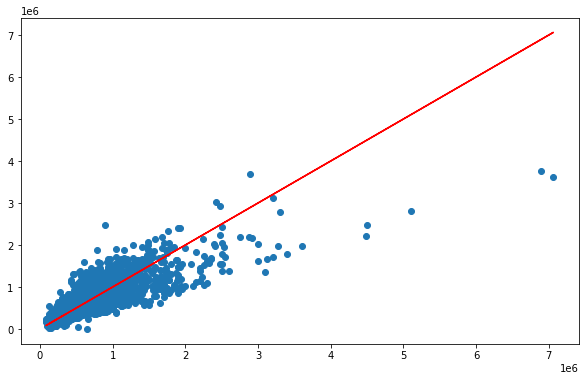

In [48]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_test, test_pred)
ax.plot(y_test,y_test,'r')

In [49]:
model = Sequential()
model.add(Input(shape = (16,))) 
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(1))             
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train, y_train.values,
          validation_data=(X_val,y_val.values),
          epochs=500, batch_size=100)


Epoch 1/500
114/114 [==============================] - 0s 2ms/step - loss: 430305738752.0000 - val_loss: 427721850880.0000
Epoch 2/500
114/114 [==============================] - 0s 1ms/step - loss: 429333970944.0000 - val_loss: 425566076928.0000
Epoch 3/500
114/114 [==============================] - 0s 1ms/step - loss: 425237610496.0000 - val_loss: 419060875264.0000
Epoch 4/500
114/114 [==============================] - 0s 2ms/step - loss: 415770542080.0000 - val_loss: 406185246720.0000
Epoch 5/500
114/114 [==============================] - 0s 1ms/step - loss: 399333785600.0000 - val_loss: 385827831808.0000
Epoch 6/500
114/114 [==============================] - 0s 1ms/step - loss: 375144087552.0000 - val_loss: 357685198848.0000
Epoch 7/500
114/114 [==============================] - 0s 1ms/step - loss: 343646633984.0000 - val_loss: 322843869184.0000
Epoch 8/500
114/114 [==============================] - 0s 1ms/step - loss: 306336366592.0000 - val_loss: 283281489920.0000
Epoch 9/500
114/

Epoch 66/500
114/114 [==============================] - 0s 1ms/step - loss: 68453425152.0000 - val_loss: 64559415296.0000
Epoch 67/500
114/114 [==============================] - 0s 1ms/step - loss: 67512291328.0000 - val_loss: 63653851136.0000
Epoch 68/500
114/114 [==============================] - 0s 1ms/step - loss: 66598322176.0000 - val_loss: 62720704512.0000
Epoch 69/500
114/114 [==============================] - 0s 1ms/step - loss: 65695432704.0000 - val_loss: 61828718592.0000
Epoch 70/500
114/114 [==============================] - 0s 1ms/step - loss: 64813563904.0000 - val_loss: 60991889408.0000
Epoch 71/500
114/114 [==============================] - 0s 1ms/step - loss: 63963467776.0000 - val_loss: 60126658560.0000
Epoch 72/500
114/114 [==============================] - 0s 1ms/step - loss: 63124295680.0000 - val_loss: 59324305408.0000
Epoch 73/500
114/114 [==============================] - 0s 1ms/step - loss: 62311849984.0000 - val_loss: 58540728320.0000
Epoch 74/500
114/114 [==

Epoch 133/500
114/114 [==============================] - 0s 1ms/step - loss: 48615849984.0000 - val_loss: 45875015680.0000
Epoch 134/500
114/114 [==============================] - 0s 1ms/step - loss: 48488624128.0000 - val_loss: 45728882688.0000
Epoch 135/500
114/114 [==============================] - 0s 1ms/step - loss: 48366686208.0000 - val_loss: 45617364992.0000
Epoch 136/500
114/114 [==============================] - 0s 1ms/step - loss: 48239349760.0000 - val_loss: 45533114368.0000
Epoch 137/500
114/114 [==============================] - 0s 1ms/step - loss: 48101711872.0000 - val_loss: 45410996224.0000
Epoch 138/500
114/114 [==============================] - 0s 1ms/step - loss: 47974932480.0000 - val_loss: 45288062976.0000
Epoch 139/500
114/114 [==============================] - 0s 1ms/step - loss: 47844216832.0000 - val_loss: 45147844608.0000
Epoch 140/500
114/114 [==============================] - 0s 1ms/step - loss: 47707742208.0000 - val_loss: 45046005760.0000
Epoch 141/500
11

114/114 [==============================] - 0s 1ms/step - loss: 41456766976.0000 - val_loss: 39546806272.0000
Epoch 200/500
114/114 [==============================] - 0s 1ms/step - loss: 41378578432.0000 - val_loss: 39473442816.0000
Epoch 201/500
114/114 [==============================] - 0s 2ms/step - loss: 41299025920.0000 - val_loss: 39410409472.0000
Epoch 202/500
114/114 [==============================] - 0s 1ms/step - loss: 41221955584.0000 - val_loss: 39372238848.0000
Epoch 203/500
114/114 [==============================] - 0s 1ms/step - loss: 41164255232.0000 - val_loss: 39301275648.0000
Epoch 204/500
114/114 [==============================] - 0s 1ms/step - loss: 41081962496.0000 - val_loss: 39275151360.0000
Epoch 205/500
114/114 [==============================] - 0s 1ms/step - loss: 41010081792.0000 - val_loss: 39190077440.0000
Epoch 206/500
114/114 [==============================] - 0s 1ms/step - loss: 40937693184.0000 - val_loss: 39102304256.0000
Epoch 207/500
114/114 [=======

114/114 [==============================] - 0s 2ms/step - loss: 38213394432.0000 - val_loss: 37117718528.0000
Epoch 266/500
114/114 [==============================] - 0s 2ms/step - loss: 38187724800.0000 - val_loss: 37048692736.0000
Epoch 267/500
114/114 [==============================] - 0s 1ms/step - loss: 38154260480.0000 - val_loss: 37066989568.0000
Epoch 268/500
114/114 [==============================] - 0s 1ms/step - loss: 38129205248.0000 - val_loss: 37009182720.0000
Epoch 269/500
114/114 [==============================] - 0s 1ms/step - loss: 38117212160.0000 - val_loss: 37013889024.0000
Epoch 270/500
114/114 [==============================] - 0s 2ms/step - loss: 38068998144.0000 - val_loss: 37006610432.0000
Epoch 271/500
114/114 [==============================] - 0s 2ms/step - loss: 38049153024.0000 - val_loss: 36974714880.0000
Epoch 272/500
114/114 [==============================] - 0s 2ms/step - loss: 38025990144.0000 - val_loss: 36930031616.0000
Epoch 273/500
114/114 [=======

114/114 [==============================] - 0s 992us/step - loss: 36842344448.0000 - val_loss: 36075175936.0000
Epoch 332/500
114/114 [==============================] - 0s 1ms/step - loss: 36824195072.0000 - val_loss: 36049235968.0000
Epoch 333/500
114/114 [==============================] - 0s 1ms/step - loss: 36813131776.0000 - val_loss: 36077498368.0000
Epoch 334/500
114/114 [==============================] - 0s 1ms/step - loss: 36793155584.0000 - val_loss: 36000755712.0000
Epoch 335/500
114/114 [==============================] - 0s 1ms/step - loss: 36793667584.0000 - val_loss: 36019523584.0000
Epoch 336/500
114/114 [==============================] - 0s 1ms/step - loss: 36758802432.0000 - val_loss: 35976982528.0000
Epoch 337/500
114/114 [==============================] - 0s 1ms/step - loss: 36745428992.0000 - val_loss: 36009009152.0000
Epoch 338/500
114/114 [==============================] - 0s 1ms/step - loss: 36739702784.0000 - val_loss: 35999547392.0000
Epoch 339/500
114/114 [=====

114/114 [==============================] - 0s 1ms/step - loss: 35982012416.0000 - val_loss: 35334193152.0000
Epoch 398/500
114/114 [==============================] - 0s 1ms/step - loss: 35970719744.0000 - val_loss: 35322720256.0000
Epoch 399/500
114/114 [==============================] - 0s 1ms/step - loss: 35979980800.0000 - val_loss: 35304706048.0000
Epoch 400/500
114/114 [==============================] - 0s 1ms/step - loss: 35951812608.0000 - val_loss: 35275624448.0000
Epoch 401/500
114/114 [==============================] - 0s 1ms/step - loss: 35933114368.0000 - val_loss: 35247067136.0000
Epoch 402/500
114/114 [==============================] - 0s 1ms/step - loss: 35924602880.0000 - val_loss: 35264704512.0000
Epoch 403/500
114/114 [==============================] - 0s 1ms/step - loss: 35906535424.0000 - val_loss: 35259305984.0000
Epoch 404/500
114/114 [==============================] - 0s 1ms/step - loss: 35903643648.0000 - val_loss: 35249721344.0000
Epoch 405/500
114/114 [=======

114/114 [==============================] - 0s 1ms/step - loss: 35342614528.0000 - val_loss: 34692730880.0000
Epoch 464/500
114/114 [==============================] - 0s 1ms/step - loss: 35339296768.0000 - val_loss: 34651271168.0000
Epoch 465/500
114/114 [==============================] - 0s 1ms/step - loss: 35349016576.0000 - val_loss: 34655617024.0000
Epoch 466/500
114/114 [==============================] - 0s 1ms/step - loss: 35325722624.0000 - val_loss: 34636222464.0000
Epoch 467/500
114/114 [==============================] - 0s 1ms/step - loss: 35336630272.0000 - val_loss: 34675675136.0000
Epoch 468/500
114/114 [==============================] - 0s 1ms/step - loss: 35304620032.0000 - val_loss: 34688221184.0000
Epoch 469/500
114/114 [==============================] - 0s 1ms/step - loss: 35302100992.0000 - val_loss: 34732453888.0000
Epoch 470/500
114/114 [==============================] - 0s 1ms/step - loss: 35288338432.0000 - val_loss: 34637713408.0000
Epoch 471/500
114/114 [=======

In [50]:
test_pred = model.predict(X_test) 
r2_score(y_test,test_pred)

0.7243628743215785

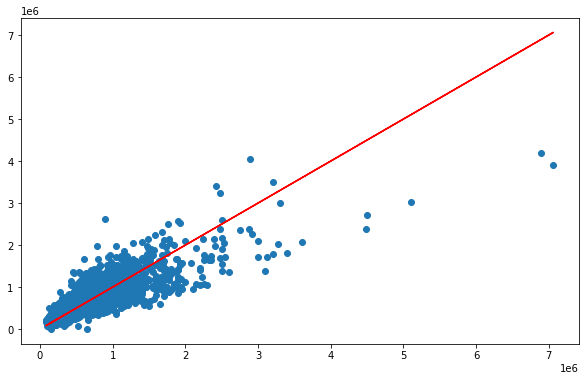

In [51]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_test, test_pred)
ax.plot(y_test,y_test,'r')

Result shows that as the number of unit increases the r2 score increases and the scatter points are more aligned with the y_test line. However, each iteration takes more time.

##  Higher Epoch?

In [52]:
model = Sequential()
model.add(Input(shape = (16,))) 
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1))             
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train, y_train.values,
          validation_data=(X_val,y_val.values),
          epochs=1000, batch_size=100)

Epoch 1/1000
114/114 [==============================] - 0s 2ms/step - loss: 430353973248.0000 - val_loss: 427940806656.0000
Epoch 2/1000
114/114 [==============================] - 0s 729us/step - loss: 430329659392.0000 - val_loss: 427896274944.0000
Epoch 3/1000
114/114 [==============================] - 0s 738us/step - loss: 430254030848.0000 - val_loss: 427780341760.0000
Epoch 4/1000
114/114 [==============================] - 0s 755us/step - loss: 430085537792.0000 - val_loss: 427551555584.0000
Epoch 5/1000
114/114 [==============================] - 0s 738us/step - loss: 429788168192.0000 - val_loss: 427178328064.0000
Epoch 6/1000
114/114 [==============================] - 0s 738us/step - loss: 429332496384.0000 - val_loss: 426631102464.0000
Epoch 7/1000
114/114 [==============================] - 0s 790us/step - loss: 428694142976.0000 - val_loss: 425888972800.0000
Epoch 8/1000
114/114 [==============================] - 0s 764us/step - loss: 427842502656.0000 - val_loss: 424907767808

114/114 [==============================] - 0s 755us/step - loss: 112887873536.0000 - val_loss: 108700532736.0000
Epoch 66/1000
114/114 [==============================] - 0s 738us/step - loss: 111378767872.0000 - val_loss: 107342241792.0000
Epoch 67/1000
114/114 [==============================] - 0s 746us/step - loss: 110114971648.0000 - val_loss: 106169335808.0000
Epoch 68/1000
114/114 [==============================] - 0s 746us/step - loss: 109052870656.0000 - val_loss: 105199026176.0000
Epoch 69/1000
114/114 [==============================] - 0s 729us/step - loss: 108178792448.0000 - val_loss: 104414707712.0000
Epoch 70/1000
114/114 [==============================] - 0s 738us/step - loss: 107466784768.0000 - val_loss: 103766220800.0000
Epoch 71/1000
114/114 [==============================] - 0s 729us/step - loss: 106881245184.0000 - val_loss: 103244611584.0000
Epoch 72/1000
114/114 [==============================] - 0s 746us/step - loss: 106409705472.0000 - val_loss: 102823821312.000

Epoch 130/1000
114/114 [==============================] - 0s 817us/step - loss: 94319452160.0000 - val_loss: 90832142336.0000
Epoch 131/1000
114/114 [==============================] - 0s 790us/step - loss: 94105862144.0000 - val_loss: 90607484928.0000
Epoch 132/1000
114/114 [==============================] - 0s 825us/step - loss: 93876985856.0000 - val_loss: 90383351808.0000
Epoch 133/1000
114/114 [==============================] - 0s 746us/step - loss: 93657964544.0000 - val_loss: 90163298304.0000
Epoch 134/1000
114/114 [==============================] - 0s 746us/step - loss: 93434642432.0000 - val_loss: 89942933504.0000
Epoch 135/1000
114/114 [==============================] - 0s 738us/step - loss: 93211009024.0000 - val_loss: 89720807424.0000
Epoch 136/1000
114/114 [==============================] - 0s 834us/step - loss: 92988366848.0000 - val_loss: 89495396352.0000
Epoch 137/1000
114/114 [==============================] - 0s 817us/step - loss: 92765667328.0000 - val_loss: 892716646

114/114 [==============================] - 0s 773us/step - loss: 78618787840.0000 - val_loss: 75097595904.0000
Epoch 196/1000
114/114 [==============================] - 0s 790us/step - loss: 78351376384.0000 - val_loss: 74838294528.0000
Epoch 197/1000
114/114 [==============================] - 0s 852us/step - loss: 78085742592.0000 - val_loss: 74566926336.0000
Epoch 198/1000
114/114 [==============================] - 0s 773us/step - loss: 77825146880.0000 - val_loss: 74302218240.0000
Epoch 199/1000
114/114 [==============================] - 0s 773us/step - loss: 77557710848.0000 - val_loss: 74040041472.0000
Epoch 200/1000
114/114 [==============================] - 0s 781us/step - loss: 77296164864.0000 - val_loss: 73778651136.0000
Epoch 201/1000
114/114 [==============================] - 0s 781us/step - loss: 77031038976.0000 - val_loss: 73513099264.0000
Epoch 202/1000
114/114 [==============================] - 0s 896us/step - loss: 76770164736.0000 - val_loss: 73253437440.0000
Epoch 2

114/114 [==============================] - 0s 1ms/step - loss: 62084370432.0000 - val_loss: 58624905216.0000
Epoch 261/1000
114/114 [==============================] - 0s 1ms/step - loss: 61877403648.0000 - val_loss: 58422996992.0000
Epoch 262/1000
114/114 [==============================] - 0s 966us/step - loss: 61671530496.0000 - val_loss: 58215211008.0000
Epoch 263/1000
114/114 [==============================] - 0s 773us/step - loss: 61464215552.0000 - val_loss: 58011586560.0000
Epoch 264/1000
114/114 [==============================] - 0s 817us/step - loss: 61262577664.0000 - val_loss: 57815916544.0000
Epoch 265/1000
114/114 [==============================] - 0s 1ms/step - loss: 61066235904.0000 - val_loss: 57619656704.0000
Epoch 266/1000
114/114 [==============================] - 0s 790us/step - loss: 60869627904.0000 - val_loss: 57425715200.0000
Epoch 267/1000
114/114 [==============================] - 0s 869us/step - loss: 60677427200.0000 - val_loss: 57232900096.0000
Epoch 268/100

114/114 [==============================] - 0s 808us/step - loss: 53503373312.0000 - val_loss: 50312249344.0000
Epoch 326/1000
114/114 [==============================] - 0s 773us/step - loss: 53437579264.0000 - val_loss: 50253217792.0000
Epoch 327/1000
114/114 [==============================] - 0s 764us/step - loss: 53378433024.0000 - val_loss: 50197258240.0000
Epoch 328/1000
114/114 [==============================] - 0s 781us/step - loss: 53320921088.0000 - val_loss: 50138513408.0000
Epoch 329/1000
114/114 [==============================] - 0s 2ms/step - loss: 53254905856.0000 - val_loss: 50087280640.0000
Epoch 330/1000
114/114 [==============================] - 0s 1ms/step - loss: 53197688832.0000 - val_loss: 50030342144.0000
Epoch 331/1000
114/114 [==============================] - 0s 1ms/step - loss: 53143011328.0000 - val_loss: 49979191296.0000
Epoch 332/1000
114/114 [==============================] - 0s 738us/step - loss: 53084123136.0000 - val_loss: 49927426048.0000
Epoch 333/100

114/114 [==============================] - 0s 781us/step - loss: 50722922496.0000 - val_loss: 47785807872.0000
Epoch 391/1000
114/114 [==============================] - 0s 808us/step - loss: 50685898752.0000 - val_loss: 47748227072.0000
Epoch 392/1000
114/114 [==============================] - 0s 939us/step - loss: 50637221888.0000 - val_loss: 47712210944.0000
Epoch 393/1000
114/114 [==============================] - 0s 852us/step - loss: 50596495360.0000 - val_loss: 47670640640.0000
Epoch 394/1000
114/114 [==============================] - 0s 799us/step - loss: 50552070144.0000 - val_loss: 47627943936.0000
Epoch 395/1000
114/114 [==============================] - 0s 790us/step - loss: 50507374592.0000 - val_loss: 47586975744.0000
Epoch 396/1000
114/114 [==============================] - 0s 817us/step - loss: 50461024256.0000 - val_loss: 47547908096.0000
Epoch 397/1000
114/114 [==============================] - 0s 904us/step - loss: 50415046656.0000 - val_loss: 47507668992.0000
Epoch 3

114/114 [==============================] - 0s 729us/step - loss: 47828611072.0000 - val_loss: 45193728000.0000
Epoch 456/1000
114/114 [==============================] - 0s 746us/step - loss: 47797542912.0000 - val_loss: 45160357888.0000
Epoch 457/1000
114/114 [==============================] - 0s 781us/step - loss: 47767982080.0000 - val_loss: 45144309760.0000
Epoch 458/1000
114/114 [==============================] - 0s 1ms/step - loss: 47735074816.0000 - val_loss: 45114785792.0000
Epoch 459/1000
114/114 [==============================] - 0s 799us/step - loss: 47707340800.0000 - val_loss: 45086134272.0000
Epoch 460/1000
114/114 [==============================] - 0s 790us/step - loss: 47681216512.0000 - val_loss: 45055741952.0000
Epoch 461/1000
114/114 [==============================] - 0s 764us/step - loss: 47651655680.0000 - val_loss: 45032439808.0000
Epoch 462/1000
114/114 [==============================] - 0s 799us/step - loss: 47627968512.0000 - val_loss: 45003350016.0000
Epoch 463

114/114 [==============================] - 0s 887us/step - loss: 46257360896.0000 - val_loss: 43801485312.0000
Epoch 521/1000
114/114 [==============================] - 0s 746us/step - loss: 46240772096.0000 - val_loss: 43782197248.0000
Epoch 522/1000
114/114 [==============================] - 0s 790us/step - loss: 46217175040.0000 - val_loss: 43760386048.0000
Epoch 523/1000
114/114 [==============================] - 0s 773us/step - loss: 46197243904.0000 - val_loss: 43742040064.0000
Epoch 524/1000
114/114 [==============================] - 0s 773us/step - loss: 46176448512.0000 - val_loss: 43728568320.0000
Epoch 525/1000
114/114 [==============================] - 0s 843us/step - loss: 46156455936.0000 - val_loss: 43706789888.0000
Epoch 526/1000
114/114 [==============================] - 0s 834us/step - loss: 46135599104.0000 - val_loss: 43690471424.0000
Epoch 527/1000
114/114 [==============================] - 0s 790us/step - loss: 46116974592.0000 - val_loss: 43676037120.0000
Epoch 5

114/114 [==============================] - 0s 764us/step - loss: 45006262272.0000 - val_loss: 42689064960.0000
Epoch 586/1000
114/114 [==============================] - 0s 746us/step - loss: 44980621312.0000 - val_loss: 42666000384.0000
Epoch 587/1000
114/114 [==============================] - 0s 746us/step - loss: 44963475456.0000 - val_loss: 42651729920.0000
Epoch 588/1000
114/114 [==============================] - 0s 746us/step - loss: 44941041664.0000 - val_loss: 42634244096.0000
Epoch 589/1000
114/114 [==============================] - 0s 773us/step - loss: 44921942016.0000 - val_loss: 42610749440.0000
Epoch 590/1000
114/114 [==============================] - 0s 746us/step - loss: 44900864000.0000 - val_loss: 42589675520.0000
Epoch 591/1000
114/114 [==============================] - 0s 764us/step - loss: 44876992512.0000 - val_loss: 42578714624.0000
Epoch 592/1000
114/114 [==============================] - 0s 755us/step - loss: 44857757696.0000 - val_loss: 42556682240.0000
Epoch 5

Epoch 650/1000
114/114 [==============================] - 0s 781us/step - loss: 43271331840.0000 - val_loss: 41152614400.0000
Epoch 651/1000
114/114 [==============================] - 0s 755us/step - loss: 43245350912.0000 - val_loss: 41136279552.0000
Epoch 652/1000
114/114 [==============================] - 0s 764us/step - loss: 43219947520.0000 - val_loss: 41123905536.0000
Epoch 653/1000
114/114 [==============================] - 0s 773us/step - loss: 43199180800.0000 - val_loss: 41109843968.0000
Epoch 654/1000
114/114 [==============================] - 0s 755us/step - loss: 43187798016.0000 - val_loss: 41087266816.0000
Epoch 655/1000
114/114 [==============================] - 0s 746us/step - loss: 43156152320.0000 - val_loss: 41071284224.0000
Epoch 656/1000
114/114 [==============================] - 0s 781us/step - loss: 43138428928.0000 - val_loss: 41046519808.0000
Epoch 657/1000
114/114 [==============================] - 0s 746us/step - loss: 43118399488.0000 - val_loss: 410380288

114/114 [==============================] - 0s 790us/step - loss: 42058330112.0000 - val_loss: 40111972352.0000
Epoch 716/1000
114/114 [==============================] - 0s 764us/step - loss: 42040860672.0000 - val_loss: 40091660288.0000
Epoch 717/1000
114/114 [==============================] - 0s 746us/step - loss: 42022367232.0000 - val_loss: 40073953280.0000
Epoch 718/1000
114/114 [==============================] - 0s 729us/step - loss: 42000850944.0000 - val_loss: 40060010496.0000
Epoch 719/1000
114/114 [==============================] - 0s 746us/step - loss: 41976791040.0000 - val_loss: 40035123200.0000
Epoch 720/1000
114/114 [==============================] - 0s 746us/step - loss: 41958612992.0000 - val_loss: 40021082112.0000
Epoch 721/1000
114/114 [==============================] - 0s 922us/step - loss: 41938214912.0000 - val_loss: 40002449408.0000
Epoch 722/1000
114/114 [==============================] - 0s 799us/step - loss: 41920634880.0000 - val_loss: 39979458560.0000
Epoch 7

114/114 [==============================] - 0s 746us/step - loss: 40551985152.0000 - val_loss: 38829481984.0000
Epoch 781/1000
114/114 [==============================] - 0s 773us/step - loss: 40528531456.0000 - val_loss: 38811123712.0000
Epoch 782/1000
114/114 [==============================] - 0s 773us/step - loss: 40509276160.0000 - val_loss: 38796955648.0000
Epoch 783/1000
114/114 [==============================] - 0s 764us/step - loss: 40490668032.0000 - val_loss: 38779797504.0000
Epoch 784/1000
114/114 [==============================] - 0s 764us/step - loss: 40466436096.0000 - val_loss: 38765301760.0000
Epoch 785/1000
114/114 [==============================] - 0s 764us/step - loss: 40444190720.0000 - val_loss: 38747336704.0000
Epoch 786/1000
114/114 [==============================] - 0s 746us/step - loss: 40427384832.0000 - val_loss: 38729285632.0000
Epoch 787/1000
114/114 [==============================] - 0s 781us/step - loss: 40413429760.0000 - val_loss: 38719033344.0000
Epoch 7

114/114 [==============================] - 0s 773us/step - loss: 39537917952.0000 - val_loss: 38048559104.0000
Epoch 845/1000
114/114 [==============================] - 0s 773us/step - loss: 39526928384.0000 - val_loss: 38042759168.0000
Epoch 846/1000
114/114 [==============================] - 0s 755us/step - loss: 39519961088.0000 - val_loss: 38032547840.0000
Epoch 847/1000
114/114 [==============================] - 0s 755us/step - loss: 39503237120.0000 - val_loss: 38023688192.0000
Epoch 848/1000
114/114 [==============================] - 0s 764us/step - loss: 39492993024.0000 - val_loss: 38007541760.0000
Epoch 849/1000
114/114 [==============================] - 0s 773us/step - loss: 39484399616.0000 - val_loss: 38014742528.0000
Epoch 850/1000
114/114 [==============================] - 0s 764us/step - loss: 39474520064.0000 - val_loss: 37996326912.0000
Epoch 851/1000
114/114 [==============================] - 0s 764us/step - loss: 39456645120.0000 - val_loss: 37987545088.0000
Epoch 8

Epoch 909/1000
114/114 [==============================] - 0s 773us/step - loss: 38887653376.0000 - val_loss: 37551194112.0000
Epoch 910/1000
114/114 [==============================] - 0s 781us/step - loss: 38875803648.0000 - val_loss: 37552840704.0000
Epoch 911/1000
114/114 [==============================] - 0s 773us/step - loss: 38868140032.0000 - val_loss: 37544108032.0000
Epoch 912/1000
114/114 [==============================] - 0s 755us/step - loss: 38857830400.0000 - val_loss: 37535371264.0000
Epoch 913/1000
114/114 [==============================] - 0s 738us/step - loss: 38846074880.0000 - val_loss: 37527040000.0000
Epoch 914/1000
114/114 [==============================] - 0s 773us/step - loss: 38839619584.0000 - val_loss: 37526966272.0000
Epoch 915/1000
114/114 [==============================] - 0s 746us/step - loss: 38829658112.0000 - val_loss: 37520175104.0000
Epoch 916/1000
114/114 [==============================] - 0s 773us/step - loss: 38822273024.0000 - val_loss: 375198842

114/114 [==============================] - 0s 746us/step - loss: 38352986112.0000 - val_loss: 37175783424.0000
Epoch 975/1000
114/114 [==============================] - 0s 746us/step - loss: 38346645504.0000 - val_loss: 37172695040.0000
Epoch 976/1000
114/114 [==============================] - 0s 746us/step - loss: 38338482176.0000 - val_loss: 37168873472.0000
Epoch 977/1000
114/114 [==============================] - 0s 764us/step - loss: 38333054976.0000 - val_loss: 37164544000.0000
Epoch 978/1000
114/114 [==============================] - 0s 729us/step - loss: 38324736000.0000 - val_loss: 37155221504.0000
Epoch 979/1000
114/114 [==============================] - 0s 755us/step - loss: 38317735936.0000 - val_loss: 37147975680.0000
Epoch 980/1000
114/114 [==============================] - 0s 720us/step - loss: 38312656896.0000 - val_loss: 37150175232.0000
Epoch 981/1000
114/114 [==============================] - 0s 738us/step - loss: 38303887360.0000 - val_loss: 37140865024.0000
Epoch 9

In [53]:
test_pred = model.predict(X_test) 
r2_score(y_test,test_pred)

0.7032122367507468

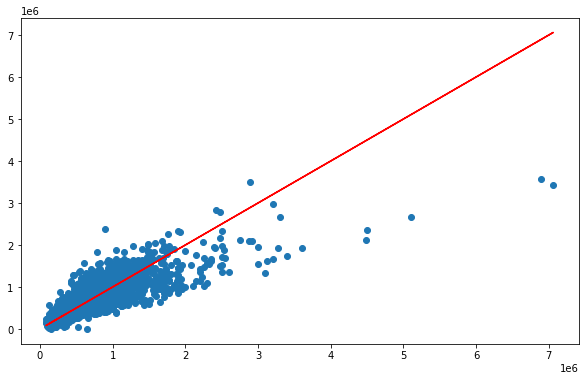

In [54]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_test, test_pred)
ax.plot(y_test,y_test,'r')

More Epoch definitely helps. But if it's too high it can cause overfit.

## Batch size

Since lowering the batch size will increase the time of training, we will try out increase the batch size and see the effect

In [55]:
model = Sequential()
model.add(Input(shape = (16,))) 
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1))             
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train, y_train.values,
          validation_data=(X_val,y_val.values),
          epochs=500, batch_size=1000)

Epoch 1/500
12/12 [==============================] - 0s 10ms/step - loss: 430357905408.0000 - val_loss: 427951226880.0000
Epoch 2/500
12/12 [==============================] - 0s 2ms/step - loss: 430357643264.0000 - val_loss: 427950964736.0000
Epoch 3/500
12/12 [==============================] - 0s 2ms/step - loss: 430357282816.0000 - val_loss: 427950604288.0000
Epoch 4/500
12/12 [==============================] - 0s 2ms/step - loss: 430356856832.0000 - val_loss: 427950080000.0000
Epoch 5/500
12/12 [==============================] - 0s 2ms/step - loss: 430356332544.0000 - val_loss: 427949391872.0000
Epoch 6/500
12/12 [==============================] - 0s 2ms/step - loss: 430355578880.0000 - val_loss: 427948507136.0000
Epoch 7/500
12/12 [==============================] - 0s 2ms/step - loss: 430354563072.0000 - val_loss: 427947425792.0000
Epoch 8/500
12/12 [==============================] - 0s 2ms/step - loss: 430353350656.0000 - val_loss: 427945984000.0000
Epoch 9/500
12/12 [============

12/12 [==============================] - 0s 2ms/step - loss: 427669520384.0000 - val_loss: 425189277696.0000
Epoch 69/500
12/12 [==============================] - 0s 2ms/step - loss: 427553587200.0000 - val_loss: 425071443968.0000
Epoch 70/500
12/12 [==============================] - 0s 2ms/step - loss: 427434377216.0000 - val_loss: 424950595584.0000
Epoch 71/500
12/12 [==============================] - 0s 2ms/step - loss: 427312250880.0000 - val_loss: 424826437632.0000
Epoch 72/500
12/12 [==============================] - 0s 2ms/step - loss: 427187240960.0000 - val_loss: 424698445824.0000
Epoch 73/500
12/12 [==============================] - 0s 2ms/step - loss: 427058233344.0000 - val_loss: 424567963648.0000
Epoch 74/500
12/12 [==============================] - 0s 2ms/step - loss: 426926866432.0000 - val_loss: 424433647616.0000
Epoch 75/500
12/12 [==============================] - 0s 2ms/step - loss: 426791632896.0000 - val_loss: 424296972288.0000
Epoch 76/500
12/12 [=================

12/12 [==============================] - 0s 2ms/step - loss: 411927543808.0000 - val_loss: 409256263680.0000
Epoch 135/500
12/12 [==============================] - 0s 2ms/step - loss: 411553955840.0000 - val_loss: 408876974080.0000
Epoch 136/500
12/12 [==============================] - 0s 2ms/step - loss: 411174862848.0000 - val_loss: 408493883392.0000
Epoch 137/500
12/12 [==============================] - 0s 2ms/step - loss: 410790199296.0000 - val_loss: 408107352064.0000
Epoch 138/500
12/12 [==============================] - 0s 2ms/step - loss: 410402258944.0000 - val_loss: 407714299904.0000
Epoch 139/500
12/12 [==============================] - 0s 2ms/step - loss: 410009731072.0000 - val_loss: 407317282816.0000
Epoch 140/500
12/12 [==============================] - 0s 2ms/step - loss: 409612615680.0000 - val_loss: 406917808128.0000
Epoch 141/500
12/12 [==============================] - 0s 2ms/step - loss: 409211699200.0000 - val_loss: 406514106368.0000
Epoch 142/500
12/12 [=========

Epoch 201/500
12/12 [==============================] - 0s 2ms/step - loss: 377586319360.0000 - val_loss: 374656630784.0000
Epoch 202/500
12/12 [==============================] - 0s 2ms/step - loss: 376938070016.0000 - val_loss: 374007496704.0000
Epoch 203/500
12/12 [==============================] - 0s 2ms/step - loss: 376289198080.0000 - val_loss: 373353250816.0000
Epoch 204/500
12/12 [==============================] - 0s 2ms/step - loss: 375634198528.0000 - val_loss: 372694941696.0000
Epoch 205/500
12/12 [==============================] - 0s 2ms/step - loss: 374975037440.0000 - val_loss: 372031193088.0000
Epoch 206/500
12/12 [==============================] - 0s 2ms/step - loss: 374312009728.0000 - val_loss: 371363774464.0000
Epoch 207/500
12/12 [==============================] - 0s 2ms/step - loss: 373646786560.0000 - val_loss: 370696028160.0000
Epoch 208/500
12/12 [==============================] - 0s 2ms/step - loss: 372979957760.0000 - val_loss: 370023858176.0000
Epoch 209/500
12

12/12 [==============================] - 0s 2ms/step - loss: 327871037440.0000 - val_loss: 324682416128.0000
Epoch 268/500
12/12 [==============================] - 0s 2ms/step - loss: 327023132672.0000 - val_loss: 323834806272.0000
Epoch 269/500
12/12 [==============================] - 0s 2ms/step - loss: 326177619968.0000 - val_loss: 322981920768.0000
Epoch 270/500
12/12 [==============================] - 0s 2ms/step - loss: 325326536704.0000 - val_loss: 322129068032.0000
Epoch 271/500
12/12 [==============================] - 0s 2ms/step - loss: 324473716736.0000 - val_loss: 321272315904.0000
Epoch 272/500
12/12 [==============================] - 0s 2ms/step - loss: 323616768000.0000 - val_loss: 320415072256.0000
Epoch 273/500
12/12 [==============================] - 0s 2ms/step - loss: 322759917568.0000 - val_loss: 319554256896.0000
Epoch 274/500
12/12 [==============================] - 0s 2ms/step - loss: 321903427584.0000 - val_loss: 318686330880.0000
Epoch 275/500
12/12 [=========

Epoch 334/500
12/12 [==============================] - 0s 2ms/step - loss: 267742068736.0000 - val_loss: 264335196160.0000
Epoch 335/500
12/12 [==============================] - 0s 2ms/step - loss: 266815897600.0000 - val_loss: 263404634112.0000
Epoch 336/500
12/12 [==============================] - 0s 2ms/step - loss: 265889169408.0000 - val_loss: 262472843264.0000
Epoch 337/500
12/12 [==============================] - 0s 2ms/step - loss: 264963244032.0000 - val_loss: 261543297024.0000
Epoch 338/500
12/12 [==============================] - 0s 2ms/step - loss: 264035237888.0000 - val_loss: 260615208960.0000
Epoch 339/500
12/12 [==============================] - 0s 2ms/step - loss: 263115636736.0000 - val_loss: 259683352576.0000
Epoch 340/500
12/12 [==============================] - 0s 2ms/step - loss: 262181142528.0000 - val_loss: 258758918144.0000
Epoch 341/500
12/12 [==============================] - 0s 2ms/step - loss: 261263261696.0000 - val_loss: 257828732928.0000
Epoch 342/500
12

12/12 [==============================] - 0s 2ms/step - loss: 208134651904.0000 - val_loss: 204581158912.0000
Epoch 401/500
12/12 [==============================] - 0s 2ms/step - loss: 207272869888.0000 - val_loss: 203725160448.0000
Epoch 402/500
12/12 [==============================] - 0s 2ms/step - loss: 206423851008.0000 - val_loss: 202868850688.0000
Epoch 403/500
12/12 [==============================] - 0s 2ms/step - loss: 205571342336.0000 - val_loss: 202019094528.0000
Epoch 404/500
12/12 [==============================] - 0s 2ms/step - loss: 204720570368.0000 - val_loss: 201168371712.0000
Epoch 405/500
12/12 [==============================] - 0s 2ms/step - loss: 203881005056.0000 - val_loss: 200315355136.0000
Epoch 406/500
12/12 [==============================] - 0s 2ms/step - loss: 203032477696.0000 - val_loss: 199474692096.0000
Epoch 407/500
12/12 [==============================] - 0s 2ms/step - loss: 202190667776.0000 - val_loss: 198634586112.0000
Epoch 408/500
12/12 [=========

Epoch 467/500
12/12 [==============================] - 0s 2ms/step - loss: 157281861632.0000 - val_loss: 153689440256.0000
Epoch 468/500
12/12 [==============================] - 0s 2ms/step - loss: 156637626368.0000 - val_loss: 153052905472.0000
Epoch 469/500
12/12 [==============================] - 0s 2ms/step - loss: 156008677376.0000 - val_loss: 152411324416.0000
Epoch 470/500
12/12 [==============================] - 0s 2ms/step - loss: 155371061248.0000 - val_loss: 151783079936.0000
Epoch 471/500
12/12 [==============================] - 0s 4ms/step - loss: 154745094144.0000 - val_loss: 151161536512.0000
Epoch 472/500
12/12 [==============================] - 0s 4ms/step - loss: 154125729792.0000 - val_loss: 150536830976.0000
Epoch 473/500
12/12 [==============================] - 0s 2ms/step - loss: 153504677888.0000 - val_loss: 149914484736.0000
Epoch 474/500
12/12 [==============================] - 0s 2ms/step - loss: 152888049664.0000 - val_loss: 149302214656.0000
Epoch 475/500
12

In [56]:
test_pred = model.predict(X_test) 
r2_score(y_test,test_pred)

-0.009476308443632453

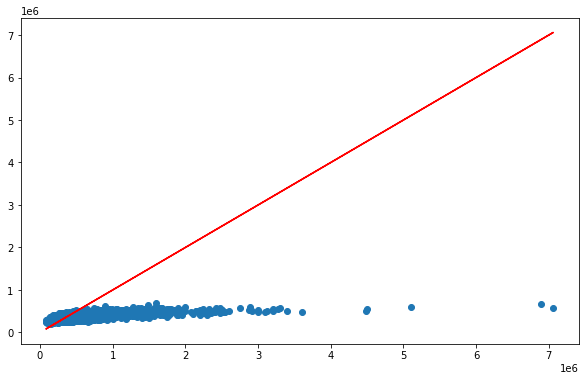

In [57]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_test, test_pred)
ax.plot(y_test,y_test,'r')

The model definitely did not train well with high batch size.

# Creating Better Model

From what we have tested out:
- More unit
- More Epoch
- Less Batch Size

will increase the accuracy the model. Therefore, lets try out a model with all three conditions combined. We will increase the unit to 100, epochs to 1000, and decrease the batch size to 10.

In [58]:
model = Sequential()
model.add(Input(shape = (16,))) 
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(1))             
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train, y_train.values,
          validation_data=(X_val,y_val.values),
          epochs=1000, batch_size=10)

Epoch 1/1000
1134/1134 [==============================] - 1s 1ms/step - loss: 372095254528.0000 - val_loss: 231876280320.0000
Epoch 2/1000
1134/1134 [==============================] - 1s 754us/step - loss: 136989630464.0000 - val_loss: 102841655296.0000
Epoch 3/1000
1134/1134 [==============================] - 1s 806us/step - loss: 104355635200.0000 - val_loss: 99546742784.0000
Epoch 4/1000
1134/1134 [==============================] - 1s 811us/step - loss: 101358125056.0000 - val_loss: 96563863552.0000
Epoch 5/1000
1134/1134 [==============================] - 1s 865us/step - loss: 98308333568.0000 - val_loss: 93469270016.0000
Epoch 6/1000
1134/1134 [==============================] - 1s 772us/step - loss: 95214895104.0000 - val_loss: 90275373056.0000
Epoch 7/1000
1134/1134 [==============================] - 1s 758us/step - loss: 92026421248.0000 - val_loss: 87038197760.0000
Epoch 8/1000
1134/1134 [==============================] - 1s 768us/step - loss: 88710168576.0000 - val_loss: 83647

1134/1134 [==============================] - 1s 848us/step - loss: 39211298816.0000 - val_loss: 37728776192.0000
Epoch 66/1000
1134/1134 [==============================] - 1s 714us/step - loss: 39071223808.0000 - val_loss: 37591777280.0000
Epoch 67/1000
1134/1134 [==============================] - 1s 1ms/step - loss: 38935232512.0000 - val_loss: 37639258112.0000
Epoch 68/1000
1134/1134 [==============================] - 1s 929us/step - loss: 38807498752.0000 - val_loss: 37440778240.0000
Epoch 69/1000
1134/1134 [==============================] - 1s 1ms/step - loss: 38704091136.0000 - val_loss: 37340516352.0000
Epoch 70/1000
1134/1134 [==============================] - 1s 716us/step - loss: 38590578688.0000 - val_loss: 37365256192.0000
Epoch 71/1000
1134/1134 [==============================] - 1s 846us/step - loss: 38449053696.0000 - val_loss: 37161185280.0000
Epoch 72/1000
1134/1134 [==============================] - 1s 717us/step - loss: 38361382912.0000 - val_loss: 37250867200.0000
Ep

1134/1134 [==============================] - 1s 722us/step - loss: 35483758592.0000 - val_loss: 34842652672.0000
Epoch 130/1000
1134/1134 [==============================] - 1s 737us/step - loss: 35449638912.0000 - val_loss: 34728394752.0000
Epoch 131/1000
1134/1134 [==============================] - 1s 781us/step - loss: 35446661120.0000 - val_loss: 34691317760.0000
Epoch 132/1000
1134/1134 [==============================] - 1s 722us/step - loss: 35382091776.0000 - val_loss: 34653585408.0000
Epoch 133/1000
1134/1134 [==============================] - 1s 741us/step - loss: 35396112384.0000 - val_loss: 34624913408.0000
Epoch 134/1000
1134/1134 [==============================] - 1s 719us/step - loss: 35351240704.0000 - val_loss: 34647425024.0000
Epoch 135/1000
1134/1134 [==============================] - 1s 724us/step - loss: 35338293248.0000 - val_loss: 34772926464.0000
Epoch 136/1000
1134/1134 [==============================] - 1s 717us/step - loss: 35297697792.0000 - val_loss: 34662760

1134/1134 [==============================] - 1s 726us/step - loss: 34435850240.0000 - val_loss: 33634412544.0000
Epoch 194/1000
1134/1134 [==============================] - 1s 718us/step - loss: 34426953728.0000 - val_loss: 33730797568.0000
Epoch 195/1000
1134/1134 [==============================] - 1s 732us/step - loss: 34396098560.0000 - val_loss: 33504464896.0000
Epoch 196/1000
1134/1134 [==============================] - 1s 724us/step - loss: 34393608192.0000 - val_loss: 33509597184.0000
Epoch 197/1000
1134/1134 [==============================] - 1s 720us/step - loss: 34382352384.0000 - val_loss: 33566339072.0000
Epoch 198/1000
1134/1134 [==============================] - 1s 728us/step - loss: 34380906496.0000 - val_loss: 33533693952.0000
Epoch 199/1000
1134/1134 [==============================] - 1s 720us/step - loss: 34361536512.0000 - val_loss: 33489772544.0000
Epoch 200/1000
1134/1134 [==============================] - 1s 729us/step - loss: 34352558080.0000 - val_loss: 33477478

1134/1134 [==============================] - 1s 719us/step - loss: 33857474560.0000 - val_loss: 32792403968.0000
Epoch 258/1000
1134/1134 [==============================] - 1s 718us/step - loss: 33809184768.0000 - val_loss: 33182961664.0000
Epoch 259/1000
1134/1134 [==============================] - 1s 713us/step - loss: 33837142016.0000 - val_loss: 32951836672.0000
Epoch 260/1000
1134/1134 [==============================] - 1s 728us/step - loss: 33862311936.0000 - val_loss: 32766576640.0000
Epoch 261/1000
1134/1134 [==============================] - 1s 716us/step - loss: 33818499072.0000 - val_loss: 32856694784.0000
Epoch 262/1000
1134/1134 [==============================] - 1s 719us/step - loss: 33804433408.0000 - val_loss: 32857278464.0000
Epoch 263/1000
1134/1134 [==============================] - 1s 725us/step - loss: 33783310336.0000 - val_loss: 33135900672.0000
Epoch 264/1000
1134/1134 [==============================] - ETA: 0s - loss: 33900095488.000 - 1s 726us/step - loss: 337

Epoch 321/1000
1134/1134 [==============================] - 1s 815us/step - loss: 33389385728.0000 - val_loss: 32199178240.0000
Epoch 322/1000
1134/1134 [==============================] - 1s 824us/step - loss: 33376647168.0000 - val_loss: 32155789312.0000
Epoch 323/1000
1134/1134 [==============================] - 1s 729us/step - loss: 33364447232.0000 - val_loss: 32211838976.0000
Epoch 324/1000
1134/1134 [==============================] - 1s 827us/step - loss: 33356464128.0000 - val_loss: 32352800768.0000
Epoch 325/1000
1134/1134 [==============================] - 1s 724us/step - loss: 33349648384.0000 - val_loss: 32309950464.0000
Epoch 326/1000
1134/1134 [==============================] - 1s 723us/step - loss: 33350168576.0000 - val_loss: 32171012096.0000
Epoch 327/1000
1134/1134 [==============================] - 1s 768us/step - loss: 33352034304.0000 - val_loss: 32230152192.0000
Epoch 328/1000
1134/1134 [==============================] - 1s 742us/step - loss: 33313482752.0000 - val

1134/1134 [==============================] - 1s 745us/step - loss: 32883376128.0000 - val_loss: 31782459392.0000
Epoch 386/1000
1134/1134 [==============================] - 1s 741us/step - loss: 32867074048.0000 - val_loss: 31603257344.0000
Epoch 387/1000
1134/1134 [==============================] - 1s 739us/step - loss: 32829515776.0000 - val_loss: 31739197440.0000
Epoch 388/1000
1134/1134 [==============================] - 1s 782us/step - loss: 32860348416.0000 - val_loss: 31685761024.0000
Epoch 389/1000
1134/1134 [==============================] - 1s 800us/step - loss: 32827697152.0000 - val_loss: 31665498112.0000
Epoch 390/1000
1134/1134 [==============================] - 1s 740us/step - loss: 32833904640.0000 - val_loss: 31536193536.0000
Epoch 391/1000
1134/1134 [==============================] - 1s 730us/step - loss: 32836513792.0000 - val_loss: 31558365184.0000
Epoch 392/1000
1134/1134 [==============================] - 1s 724us/step - loss: 32824414208.0000 - val_loss: 31586428

1134/1134 [==============================] - 1s 1ms/step - loss: 32277377024.0000 - val_loss: 31118055424.0000
Epoch 450/1000
1134/1134 [==============================] - 1s 727us/step - loss: 32251760640.0000 - val_loss: 31013160960.0000
Epoch 451/1000
1134/1134 [==============================] - 1s 978us/step - loss: 32265422848.0000 - val_loss: 31115679744.0000
Epoch 452/1000
1134/1134 [==============================] - 1s 1ms/step - loss: 32229187584.0000 - val_loss: 31186587648.0000
Epoch 453/1000
1134/1134 [==============================] - 1s 980us/step - loss: 32228405248.0000 - val_loss: 31117111296.0000
Epoch 454/1000
1134/1134 [==============================] - 1s 849us/step - loss: 32221351936.0000 - val_loss: 31125012480.0000
Epoch 455/1000
1134/1134 [==============================] - 1s 842us/step - loss: 32228515840.0000 - val_loss: 31050387456.0000
Epoch 456/1000
1134/1134 [==============================] - 1s 875us/step - loss: 32214667264.0000 - val_loss: 31047479296.

1134/1134 [==============================] - 1s 733us/step - loss: 31672811520.0000 - val_loss: 30626607104.0000
Epoch 514/1000
1134/1134 [==============================] - 1s 723us/step - loss: 31617105920.0000 - val_loss: 30923065344.0000
Epoch 515/1000
1134/1134 [==============================] - 1s 726us/step - loss: 31673683968.0000 - val_loss: 30708060160.0000
Epoch 516/1000
1134/1134 [==============================] - 1s 729us/step - loss: 31587452928.0000 - val_loss: 30600325120.0000
Epoch 517/1000
1134/1134 [==============================] - 1s 1ms/step - loss: 31647322112.0000 - val_loss: 30618013696.0000
Epoch 518/1000
1134/1134 [==============================] - 1s 810us/step - loss: 31631519744.0000 - val_loss: 30685216768.0000
Epoch 519/1000
1134/1134 [==============================] - 1s 721us/step - loss: 31595102208.0000 - val_loss: 30611134464.0000
Epoch 520/1000
1134/1134 [==============================] - 1s 722us/step - loss: 31608373248.0000 - val_loss: 3066707148

1134/1134 [==============================] - 1s 789us/step - loss: 31098324992.0000 - val_loss: 30485164032.0000
Epoch 578/1000
1134/1134 [==============================] - 1s 735us/step - loss: 31154262016.0000 - val_loss: 30337976320.0000
Epoch 579/1000
1134/1134 [==============================] - 1s 746us/step - loss: 31145748480.0000 - val_loss: 30323802112.0000
Epoch 580/1000
1134/1134 [==============================] - 1s 799us/step - loss: 31145844736.0000 - val_loss: 30343292928.0000
Epoch 581/1000
1134/1134 [==============================] - 1s 759us/step - loss: 31153711104.0000 - val_loss: 30366486528.0000
Epoch 582/1000
1134/1134 [==============================] - 1s 732us/step - loss: 31141177344.0000 - val_loss: 30314457088.0000
Epoch 583/1000
1134/1134 [==============================] - 1s 754us/step - loss: 31136925696.0000 - val_loss: 30410033152.0000
Epoch 584/1000
1134/1134 [==============================] - 1s 768us/step - loss: 31123492864.0000 - val_loss: 30281342

1134/1134 [==============================] - 1s 711us/step - loss: 30784114688.0000 - val_loss: 30185451520.0000
Epoch 642/1000
1134/1134 [==============================] - 1s 750us/step - loss: 30764660736.0000 - val_loss: 30173886464.0000
Epoch 643/1000
1134/1134 [==============================] - 1s 719us/step - loss: 30748012544.0000 - val_loss: 30320918528.0000
Epoch 644/1000
1134/1134 [==============================] - 1s 715us/step - loss: 30729844736.0000 - val_loss: 30116433920.0000
Epoch 645/1000
1134/1134 [==============================] - 1s 711us/step - loss: 30756782080.0000 - val_loss: 30135805952.0000
Epoch 646/1000
1134/1134 [==============================] - 1s 724us/step - loss: 30731862016.0000 - val_loss: 30100875264.0000
Epoch 647/1000
1134/1134 [==============================] - 1s 721us/step - loss: 30714779648.0000 - val_loss: 30110586880.0000
Epoch 648/1000
1134/1134 [==============================] - 1s 706us/step - loss: 30693980160.0000 - val_loss: 30220328

1134/1134 [==============================] - 1s 713us/step - loss: 30451519488.0000 - val_loss: 30068733952.0000
Epoch 706/1000
1134/1134 [==============================] - 1s 786us/step - loss: 30471221248.0000 - val_loss: 29987000320.0000
Epoch 707/1000
1134/1134 [==============================] - 1s 736us/step - loss: 30441881600.0000 - val_loss: 29984382976.0000
Epoch 708/1000
1134/1134 [==============================] - ETA: 0s - loss: 29831389184.000 - 1s 726us/step - loss: 30401398784.0000 - val_loss: 30217537536.0000
Epoch 709/1000
1134/1134 [==============================] - 1s 719us/step - loss: 30437486592.0000 - val_loss: 29976426496.0000
Epoch 710/1000
1134/1134 [==============================] - 1s 721us/step - loss: 30422468608.0000 - val_loss: 30178527232.0000
Epoch 711/1000
1134/1134 [==============================] - 1s 716us/step - loss: 30428059648.0000 - val_loss: 30009825280.0000
Epoch 712/1000
1134/1134 [==============================] - 1s 714us/step - loss: 304

Epoch 769/1000
1134/1134 [==============================] - 1s 712us/step - loss: 30161211392.0000 - val_loss: 29867350016.0000
Epoch 770/1000
1134/1134 [==============================] - 1s 802us/step - loss: 30187425792.0000 - val_loss: 29847287808.0000
Epoch 771/1000
1134/1134 [==============================] - 1s 717us/step - loss: 30174996480.0000 - val_loss: 29897467904.0000
Epoch 772/1000
1134/1134 [==============================] - 1s 728us/step - loss: 30125971456.0000 - val_loss: 30144430080.0000
Epoch 773/1000
1134/1134 [==============================] - 1s 714us/step - loss: 30155223040.0000 - val_loss: 29882259456.0000
Epoch 774/1000
1134/1134 [==============================] - 1s 721us/step - loss: 30189809664.0000 - val_loss: 29988425728.0000
Epoch 775/1000
1134/1134 [==============================] - 1s 838us/step - loss: 30138818560.0000 - val_loss: 29910728704.0000
Epoch 776/1000
1134/1134 [==============================] - 1s 763us/step - loss: 30140454912.0000 - val

1134/1134 [==============================] - 1s 706us/step - loss: 29922404352.0000 - val_loss: 29804247040.0000
Epoch 834/1000
1134/1134 [==============================] - 1s 714us/step - loss: 29916385280.0000 - val_loss: 29805205504.0000
Epoch 835/1000
1134/1134 [==============================] - 1s 722us/step - loss: 29893169152.0000 - val_loss: 29829441536.0000
Epoch 836/1000
1134/1134 [==============================] - 1s 726us/step - loss: 29901780992.0000 - val_loss: 29943746560.0000
Epoch 837/1000
1134/1134 [==============================] - 1s 716us/step - loss: 29914609664.0000 - val_loss: 29833394176.0000
Epoch 838/1000
1134/1134 [==============================] - 1s 736us/step - loss: 29904351232.0000 - val_loss: 30068461568.0000
Epoch 839/1000
1134/1134 [==============================] - 1s 724us/step - loss: 29911439360.0000 - val_loss: 29833426944.0000
Epoch 840/1000
1134/1134 [==============================] - 1s 725us/step - loss: 29908944896.0000 - val_loss: 29843714

1134/1134 [==============================] - 1s 726us/step - loss: 29669011456.0000 - val_loss: 29765414912.0000
Epoch 898/1000
1134/1134 [==============================] - 1s 726us/step - loss: 29672826880.0000 - val_loss: 29727954944.0000
Epoch 899/1000
1134/1134 [==============================] - 1s 718us/step - loss: 29679204352.0000 - val_loss: 29749850112.0000
Epoch 900/1000
1134/1134 [==============================] - 1s 709us/step - loss: 29660755968.0000 - val_loss: 29779210240.0000
Epoch 901/1000
1134/1134 [==============================] - 1s 728us/step - loss: 29633304576.0000 - val_loss: 29737598976.0000
Epoch 902/1000
1134/1134 [==============================] - 1s 723us/step - loss: 29657841664.0000 - val_loss: 29742477312.0000
Epoch 903/1000
1134/1134 [==============================] - 1s 719us/step - loss: 29651531776.0000 - val_loss: 29797840896.0000
Epoch 904/1000
1134/1134 [==============================] - 1s 724us/step - loss: 29679740928.0000 - val_loss: 29795717

Epoch 961/1000
1134/1134 [==============================] - 1s 711us/step - loss: 29438750720.0000 - val_loss: 29650679808.0000
Epoch 962/1000
1134/1134 [==============================] - 1s 710us/step - loss: 29421838336.0000 - val_loss: 29910079488.0000
Epoch 963/1000
1134/1134 [==============================] - 1s 714us/step - loss: 29449506816.0000 - val_loss: 29877653504.0000
Epoch 964/1000
1134/1134 [==============================] - 1s 711us/step - loss: 29390510080.0000 - val_loss: 30155106304.0000
Epoch 965/1000
1134/1134 [==============================] - 1s 717us/step - loss: 29430280192.0000 - val_loss: 29686269952.0000
Epoch 966/1000
1134/1134 [==============================] - 1s 750us/step - loss: 29424869376.0000 - val_loss: 29760581632.0000
Epoch 967/1000
1134/1134 [==============================] - 1s 747us/step - loss: 29422376960.0000 - val_loss: 29660821504.0000
Epoch 968/1000
1134/1134 [==============================] - 1s 706us/step - loss: 29440382976.0000 - val

<AxesSubplot:>

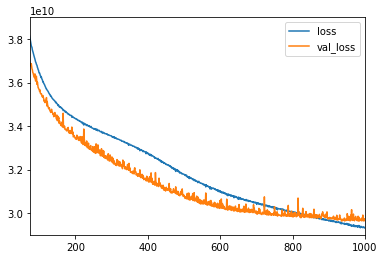

In [59]:
loss = pd.DataFrame(model.history.history)
loss.plot(xlim=(75,1000), ylim=(0.29e11,0.39e11))

<AxesSubplot:>

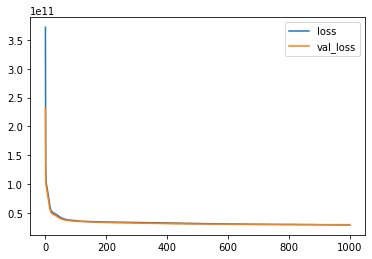

In [60]:
loss.plot()

Although loss function looks stable, if we zoom into it, it is still decreasing.

In [61]:
test_pred = model.predict(X_test) 
r2_score(y_test,test_pred)

0.7497961743853006

In [62]:
mean_absolute_error(y_test,test_pred)

106435.67326268325

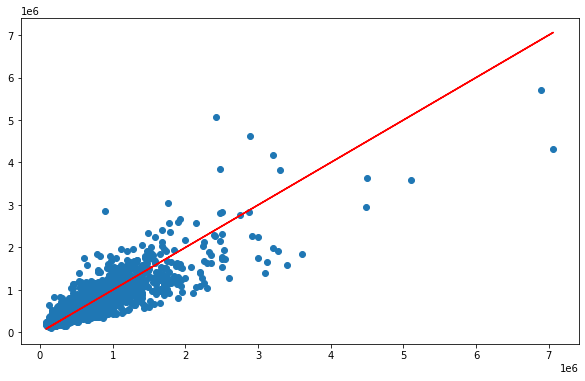

In [63]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_test, test_pred)
ax.plot(y_test,y_test,'r')

The result shows that the r square is definitely the highest out of all the other models we created. However, we see the scatter plot is also more spread out, which might mean overfitting.

# Another Question: More hidden layer?

Lets try out adding 1 more hidden layer and see the result. We will use the original model for faster result. We will label the model to model2 so that we do not erase the previous model.

In [64]:
model2 = Sequential()
model2.add(Input(shape = (16,))) 
model2.add(Dense(16, activation = 'relu'))
model2.add(Dense(16, activation = 'relu'))
model2.add(Dense(16, activation = 'relu'))
model2.add(Dense(1))             
model2.compile(optimizer='adam',loss='mean_squared_error')
model2.fit(X_train, y_train.values,
          validation_data=(X_val,y_val.values),
          epochs=500, batch_size=100)

Epoch 1/500
114/114 [==============================] - 0s 2ms/step - loss: 430354989056.0000 - val_loss: 427936514048.0000
Epoch 2/500
114/114 [==============================] - 0s 852us/step - loss: 430223982592.0000 - val_loss: 427549360128.0000
Epoch 3/500
114/114 [==============================] - 0s 922us/step - loss: 429133758464.0000 - val_loss: 425398829056.0000
Epoch 4/500
114/114 [==============================] - 0s 860us/step - loss: 425181315072.0000 - val_loss: 419117367296.0000
Epoch 5/500
114/114 [==============================] - 0s 825us/step - loss: 415691145216.0000 - val_loss: 405806809088.0000
Epoch 6/500
114/114 [==============================] - 0s 887us/step - loss: 397798440960.0000 - val_loss: 382741577728.0000
Epoch 7/500
114/114 [==============================] - 0s 869us/step - loss: 369403199488.0000 - val_loss: 348542205952.0000
Epoch 8/500
114/114 [==============================] - 0s 808us/step - loss: 329895477248.0000 - val_loss: 303682650112.0000
Ep

Epoch 67/500
114/114 [==============================] - 0s 790us/step - loss: 63981350912.0000 - val_loss: 60104675328.0000
Epoch 68/500
114/114 [==============================] - 0s 764us/step - loss: 63069290496.0000 - val_loss: 59182145536.0000
Epoch 69/500
114/114 [==============================] - 0s 790us/step - loss: 62100602880.0000 - val_loss: 58285887488.0000
Epoch 70/500
114/114 [==============================] - 0s 896us/step - loss: 61218865152.0000 - val_loss: 57459527680.0000
Epoch 71/500
114/114 [==============================] - 0s 1ms/step - loss: 60374990848.0000 - val_loss: 56614166528.0000
Epoch 72/500
114/114 [==============================] - 0s 896us/step - loss: 59575541760.0000 - val_loss: 55904485376.0000
Epoch 73/500
114/114 [==============================] - 0s 799us/step - loss: 58858274816.0000 - val_loss: 55153377280.0000
Epoch 74/500
114/114 [==============================] - 0s 843us/step - loss: 58137894912.0000 - val_loss: 54497562624.0000
Epoch 75/5

Epoch 133/500
114/114 [==============================] - 0s 764us/step - loss: 45756260352.0000 - val_loss: 43297951744.0000
Epoch 134/500
114/114 [==============================] - 0s 790us/step - loss: 45636804608.0000 - val_loss: 43171241984.0000
Epoch 135/500
114/114 [==============================] - 0s 790us/step - loss: 45510733824.0000 - val_loss: 43069661184.0000
Epoch 136/500
114/114 [==============================] - 0s 781us/step - loss: 45394145280.0000 - val_loss: 42946076672.0000
Epoch 137/500
114/114 [==============================] - 0s 773us/step - loss: 45274533888.0000 - val_loss: 42850037760.0000
Epoch 138/500
114/114 [==============================] - 0s 764us/step - loss: 45142102016.0000 - val_loss: 42736930816.0000
Epoch 139/500
114/114 [==============================] - 0s 773us/step - loss: 45019406336.0000 - val_loss: 42615939072.0000
Epoch 140/500
114/114 [==============================] - 0s 790us/step - loss: 44880470016.0000 - val_loss: 42497462272.0000


114/114 [==============================] - 0s 790us/step - loss: 39762108416.0000 - val_loss: 38241730560.0000
Epoch 199/500
114/114 [==============================] - 0s 781us/step - loss: 39722283008.0000 - val_loss: 38194585600.0000
Epoch 200/500
114/114 [==============================] - 0s 773us/step - loss: 39629967360.0000 - val_loss: 38104113152.0000
Epoch 201/500
114/114 [==============================] - 0s 755us/step - loss: 39594123264.0000 - val_loss: 38057115648.0000
Epoch 202/500
114/114 [==============================] - 0s 755us/step - loss: 39542804480.0000 - val_loss: 38026899456.0000
Epoch 203/500
114/114 [==============================] - 0s 773us/step - loss: 39463247872.0000 - val_loss: 37988020224.0000
Epoch 204/500
114/114 [==============================] - 0s 790us/step - loss: 39404752896.0000 - val_loss: 37973045248.0000
Epoch 205/500
114/114 [==============================] - 0s 790us/step - loss: 39359000576.0000 - val_loss: 37912317952.0000
Epoch 206/500


114/114 [==============================] - 0s 808us/step - loss: 37341704192.0000 - val_loss: 36471967744.0000
Epoch 264/500
114/114 [==============================] - 0s 808us/step - loss: 37311160320.0000 - val_loss: 36503097344.0000
Epoch 265/500
114/114 [==============================] - 0s 781us/step - loss: 37267914752.0000 - val_loss: 36436684800.0000
Epoch 266/500
114/114 [==============================] - 0s 799us/step - loss: 37253033984.0000 - val_loss: 36444839936.0000
Epoch 267/500
114/114 [==============================] - 0s 799us/step - loss: 37231468544.0000 - val_loss: 36409380864.0000
Epoch 268/500
114/114 [==============================] - 0s 790us/step - loss: 37219237888.0000 - val_loss: 36439080960.0000
Epoch 269/500
114/114 [==============================] - 0s 790us/step - loss: 37191704576.0000 - val_loss: 36350578688.0000
Epoch 270/500
114/114 [==============================] - 0s 808us/step - loss: 37193674752.0000 - val_loss: 36346126336.0000
Epoch 271/500


114/114 [==============================] - 0s 781us/step - loss: 36283715584.0000 - val_loss: 35589701632.0000
Epoch 329/500
114/114 [==============================] - 0s 781us/step - loss: 36286328832.0000 - val_loss: 35639181312.0000
Epoch 330/500
114/114 [==============================] - 0s 773us/step - loss: 36278415360.0000 - val_loss: 35611779072.0000
Epoch 331/500
114/114 [==============================] - 0s 781us/step - loss: 36264419328.0000 - val_loss: 35545251840.0000
Epoch 332/500
114/114 [==============================] - 0s 781us/step - loss: 36231225344.0000 - val_loss: 35546296320.0000
Epoch 333/500
114/114 [==============================] - 0s 790us/step - loss: 36234661888.0000 - val_loss: 35560194048.0000
Epoch 334/500
114/114 [==============================] - 0s 799us/step - loss: 36220866560.0000 - val_loss: 35559235584.0000
Epoch 335/500
114/114 [==============================] - 0s 781us/step - loss: 36221677568.0000 - val_loss: 35542392832.0000
Epoch 336/500


114/114 [==============================] - 0s 790us/step - loss: 35602132992.0000 - val_loss: 35065180160.0000
Epoch 394/500
114/114 [==============================] - 0s 773us/step - loss: 35619131392.0000 - val_loss: 34899083264.0000
Epoch 395/500
114/114 [==============================] - 0s 808us/step - loss: 35585552384.0000 - val_loss: 34938478592.0000
Epoch 396/500
114/114 [==============================] - 0s 764us/step - loss: 35572940800.0000 - val_loss: 34915807232.0000
Epoch 397/500
114/114 [==============================] - 0s 773us/step - loss: 35576397824.0000 - val_loss: 34884685824.0000
Epoch 398/500
114/114 [==============================] - 0s 773us/step - loss: 35546525696.0000 - val_loss: 34889240576.0000
Epoch 399/500
114/114 [==============================] - 0s 781us/step - loss: 35537936384.0000 - val_loss: 34934820864.0000
Epoch 400/500
114/114 [==============================] - ETA: 0s - loss: 36257812480.000 - 0s 773us/step - loss: 35531403264.0000 - val_los

114/114 [==============================] - 0s 773us/step - loss: 35072978944.0000 - val_loss: 34340438016.0000
Epoch 459/500
114/114 [==============================] - 0s 773us/step - loss: 35070406656.0000 - val_loss: 34358589440.0000
Epoch 460/500
114/114 [==============================] - 0s 764us/step - loss: 35062517760.0000 - val_loss: 34316738560.0000
Epoch 461/500
114/114 [==============================] - 0s 781us/step - loss: 35041538048.0000 - val_loss: 34308057088.0000
Epoch 462/500
114/114 [==============================] - 0s 755us/step - loss: 35044147200.0000 - val_loss: 34296154112.0000
Epoch 463/500
114/114 [==============================] - 0s 773us/step - loss: 35035717632.0000 - val_loss: 34297559040.0000
Epoch 464/500
114/114 [==============================] - 0s 781us/step - loss: 35037450240.0000 - val_loss: 34315868160.0000
Epoch 465/500
114/114 [==============================] - 0s 773us/step - loss: 35022180352.0000 - val_loss: 34311798784.0000
Epoch 466/500


In [65]:
test_pred2 = model2.predict(X_test) 
r2_score(y_test,test_pred2)

0.726541255422172

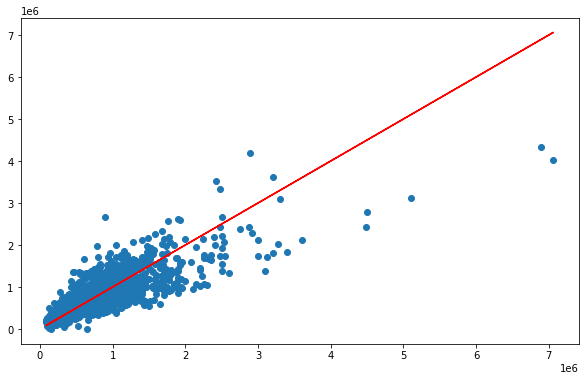

In [66]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_test, test_pred2)
ax.plot(y_test,y_test,'r')

Effect of adding 1 more hidden layer increased the r square score. How about adding 1 more?

In [67]:
model2 = Sequential()
model2.add(Input(shape = (16,))) 
model2.add(Dense(16, activation = 'relu'))
model2.add(Dense(16, activation = 'relu'))
model2.add(Dense(16, activation = 'relu'))
model2.add(Dense(16, activation = 'relu'))
model2.add(Dense(1))             
model2.compile(optimizer='adam',loss='mean_squared_error')
model2.fit(X_train, y_train.values,
          validation_data=(X_val,y_val.values),
          epochs=500, batch_size=100)

Epoch 1/500
114/114 [==============================] - 0s 2ms/step - loss: 430346993664.0000 - val_loss: 427895881728.0000
Epoch 2/500
114/114 [==============================] - 0s 808us/step - loss: 429792133120.0000 - val_loss: 426090037248.0000
Epoch 3/500
114/114 [==============================] - 0s 790us/step - loss: 423213596672.0000 - val_loss: 411103232000.0000
Epoch 4/500
114/114 [==============================] - 0s 790us/step - loss: 390130565120.0000 - val_loss: 352937377792.0000
Epoch 5/500
114/114 [==============================] - 0s 825us/step - loss: 300665372672.0000 - val_loss: 232747745280.0000
Epoch 6/500
114/114 [==============================] - 0s 808us/step - loss: 176627007488.0000 - val_loss: 125253787648.0000
Epoch 7/500
114/114 [==============================] - 0s 808us/step - loss: 112317562880.0000 - val_loss: 102130278400.0000
Epoch 8/500
114/114 [==============================] - 0s 781us/step - loss: 104766103552.0000 - val_loss: 100829986816.0000
Ep

Epoch 67/500
114/114 [==============================] - 0s 773us/step - loss: 44315308032.0000 - val_loss: 41908092928.0000
Epoch 68/500
114/114 [==============================] - 0s 808us/step - loss: 44002480128.0000 - val_loss: 41678745600.0000
Epoch 69/500
114/114 [==============================] - 0s 781us/step - loss: 43688226816.0000 - val_loss: 41375367168.0000
Epoch 70/500
114/114 [==============================] - 0s 773us/step - loss: 43431395328.0000 - val_loss: 41178554368.0000
Epoch 71/500
114/114 [==============================] - 0s 764us/step - loss: 43195441152.0000 - val_loss: 40924348416.0000
Epoch 72/500
114/114 [==============================] - 0s 781us/step - loss: 42832371712.0000 - val_loss: 40690089984.0000
Epoch 73/500
114/114 [==============================] - 0s 773us/step - loss: 42558439424.0000 - val_loss: 40560766976.0000
Epoch 74/500
114/114 [==============================] - 0s 773us/step - loss: 42321395712.0000 - val_loss: 40303861760.0000
Epoch 75

Epoch 133/500
114/114 [==============================] - 0s 790us/step - loss: 36969512960.0000 - val_loss: 36295708672.0000
Epoch 134/500
114/114 [==============================] - 0s 2ms/step - loss: 36960149504.0000 - val_loss: 36241534976.0000
Epoch 135/500
114/114 [==============================] - 0s 2ms/step - loss: 36901498880.0000 - val_loss: 36168962048.0000
Epoch 136/500
114/114 [==============================] - 0s 2ms/step - loss: 36846186496.0000 - val_loss: 36306186240.0000
Epoch 137/500
114/114 [==============================] - 0s 1ms/step - loss: 36834189312.0000 - val_loss: 36381626368.0000
Epoch 138/500
114/114 [==============================] - 0s 825us/step - loss: 36773801984.0000 - val_loss: 36188528640.0000
Epoch 139/500
114/114 [==============================] - 0s 790us/step - loss: 36730687488.0000 - val_loss: 36102733824.0000
Epoch 140/500
114/114 [==============================] - 0s 790us/step - loss: 36706635776.0000 - val_loss: 36104704000.0000
Epoch 14

Epoch 199/500
114/114 [==============================] - 0s 983us/step - loss: 35343843328.0000 - val_loss: 34762579968.0000
Epoch 200/500
114/114 [==============================] - 0s 808us/step - loss: 35256705024.0000 - val_loss: 35058790400.0000
Epoch 201/500
114/114 [==============================] - 0s 1ms/step - loss: 35328446464.0000 - val_loss: 34833784832.0000
Epoch 202/500
114/114 [==============================] - 0s 896us/step - loss: 35311550464.0000 - val_loss: 34667786240.0000
Epoch 203/500
114/114 [==============================] - 0s 834us/step - loss: 35298103296.0000 - val_loss: 34664202240.0000
Epoch 204/500
114/114 [==============================] - 0s 808us/step - loss: 35252207616.0000 - val_loss: 34626850816.0000
Epoch 205/500
114/114 [==============================] - 0s 781us/step - loss: 35233300480.0000 - val_loss: 34701869056.0000
Epoch 206/500
114/114 [==============================] - 0s 773us/step - loss: 35210354688.0000 - val_loss: 34565255168.0000
Ep

114/114 [==============================] - 0s 869us/step - loss: 34572746752.0000 - val_loss: 33756536832.0000
Epoch 265/500
114/114 [==============================] - 0s 773us/step - loss: 34516742144.0000 - val_loss: 33836242944.0000
Epoch 266/500
114/114 [==============================] - 0s 869us/step - loss: 34519322624.0000 - val_loss: 33881614336.0000
Epoch 267/500
114/114 [==============================] - 0s 2ms/step - loss: 34519048192.0000 - val_loss: 33676070912.0000
Epoch 268/500
114/114 [==============================] - 0s 2ms/step - loss: 34491604992.0000 - val_loss: 33719926784.0000
Epoch 269/500
114/114 [==============================] - 0s 799us/step - loss: 34483286016.0000 - val_loss: 33834133504.0000
Epoch 270/500
114/114 [==============================] - 0s 764us/step - loss: 34479923200.0000 - val_loss: 33671069696.0000
Epoch 271/500
114/114 [==============================] - 0s 781us/step - loss: 34416549888.0000 - val_loss: 33602762752.0000
Epoch 272/500
114/

114/114 [==============================] - 0s 781us/step - loss: 34006802432.0000 - val_loss: 33083942912.0000
Epoch 330/500
114/114 [==============================] - 0s 825us/step - loss: 33993555968.0000 - val_loss: 33048229888.0000
Epoch 331/500
114/114 [==============================] - 0s 790us/step - loss: 33992120320.0000 - val_loss: 33006774272.0000
Epoch 332/500
114/114 [==============================] - 0s 860us/step - loss: 34000228352.0000 - val_loss: 33069029376.0000
Epoch 333/500
114/114 [==============================] - 0s 773us/step - loss: 33969053696.0000 - val_loss: 33074655232.0000
Epoch 334/500
114/114 [==============================] - 0s 773us/step - loss: 33990139904.0000 - val_loss: 33098135552.0000
Epoch 335/500
114/114 [==============================] - 0s 781us/step - loss: 33949863936.0000 - val_loss: 32994011136.0000
Epoch 336/500
114/114 [==============================] - 0s 790us/step - loss: 33959905280.0000 - val_loss: 33031772160.0000
Epoch 337/500


Epoch 395/500
114/114 [==============================] - 0s 817us/step - loss: 33607112704.0000 - val_loss: 32657338368.0000
Epoch 396/500
114/114 [==============================] - 0s 860us/step - loss: 33577431040.0000 - val_loss: 32685334528.0000
Epoch 397/500
114/114 [==============================] - 0s 852us/step - loss: 33622710272.0000 - val_loss: 32770387968.0000
Epoch 398/500
114/114 [==============================] - 0s 852us/step - loss: 33623103488.0000 - val_loss: 32555610112.0000
Epoch 399/500
114/114 [==============================] - 0s 825us/step - loss: 33625032704.0000 - val_loss: 32564416512.0000
Epoch 400/500
114/114 [==============================] - 0s 904us/step - loss: 33607059456.0000 - val_loss: 32655247360.0000
Epoch 401/500
114/114 [==============================] - 0s 896us/step - loss: 33624659968.0000 - val_loss: 32545415168.0000
Epoch 402/500
114/114 [==============================] - 0s 852us/step - loss: 33533435904.0000 - val_loss: 32591144960.0000


114/114 [==============================] - 0s 799us/step - loss: 33202368512.0000 - val_loss: 32085233664.0000
Epoch 461/500
114/114 [==============================] - 0s 799us/step - loss: 33244033024.0000 - val_loss: 32092971008.0000
Epoch 462/500
114/114 [==============================] - 0s 790us/step - loss: 33218123776.0000 - val_loss: 32096987136.0000
Epoch 463/500
114/114 [==============================] - 0s 817us/step - loss: 33213417472.0000 - val_loss: 32144556032.0000
Epoch 464/500
114/114 [==============================] - 0s 878us/step - loss: 33168973824.0000 - val_loss: 32493090816.0000
Epoch 465/500
114/114 [==============================] - 0s 808us/step - loss: 33201330176.0000 - val_loss: 32201707520.0000
Epoch 466/500
114/114 [==============================] - 0s 790us/step - loss: 33223147520.0000 - val_loss: 32048658432.0000
Epoch 467/500
114/114 [==============================] - 0s 878us/step - loss: 33161074688.0000 - val_loss: 32138827776.0000
Epoch 468/500


In [68]:
test_pred2 = model2.predict(X_test) 
r2_score(y_test,test_pred2)

0.7364125268607336

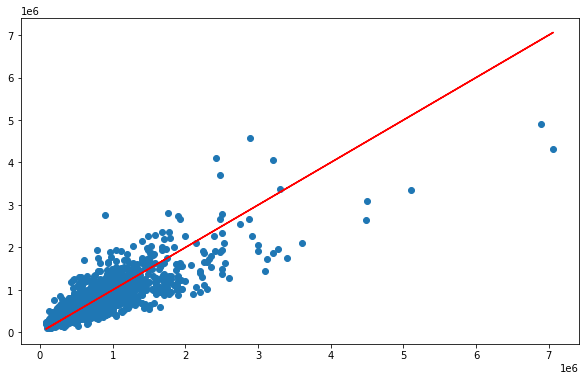

In [69]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_test, test_pred2)
ax.plot(y_test,y_test,'r')

Adding 1 more layer still increased the r squared but not as much as previous. 
- Recall that our first model had r square about .63
- Adding 1 hidden layer boosted up to around .73
- Adding 2 hidden layer resulted in around .74

# Final Model?

Now lets make a prototype of final model. We will use:
- 50 units
- 3 hidden layers
- epoch 1000
- batch size 10

Adding 4 hidden layer and 100 units will still increase the r square but they had effect of 0.01, while 50 units and 3 hidden layers each increased about 0.08.

In [71]:
model_f = Sequential()
model_f.add(Input(shape = (16,))) 
model_f.add(Dense(50, activation = 'relu'))
model_f.add(Dense(50, activation = 'relu'))
model_f.add(Dense(50, activation = 'relu'))
model_f.add(Dense(1))             
model_f.compile(optimizer='adam',loss='mean_squared_error')
model_f.fit(X_train, y_train.values,
          validation_data=(X_val,y_val.values),
          epochs=1000, batch_size=10)

Epoch 1/1000
1134/1134 [==============================] - 1s 866us/step - loss: 228858003456.0000 - val_loss: 100738883584.0000
Epoch 2/1000
1134/1134 [==============================] - 1s 854us/step - loss: 99986915328.0000 - val_loss: 92946620416.0000
Epoch 3/1000
1134/1134 [==============================] - 1s 722us/step - loss: 92111978496.0000 - val_loss: 84182605824.0000
Epoch 4/1000
1134/1134 [==============================] - 1s 696us/step - loss: 82914164736.0000 - val_loss: 74275217408.0000
Epoch 5/1000
1134/1134 [==============================] - 1s 699us/step - loss: 72542724096.0000 - val_loss: 63803047936.0000
Epoch 6/1000
1134/1134 [==============================] - 1s 703us/step - loss: 62567743488.0000 - val_loss: 55259254784.0000
Epoch 7/1000
1134/1134 [==============================] - 1s 706us/step - loss: 56164716544.0000 - val_loss: 51272564736.0000
Epoch 8/1000
1134/1134 [==============================] - 1s 701us/step - loss: 53262893056.0000 - val_loss: 4937858

1134/1134 [==============================] - 1s 720us/step - loss: 34734198784.0000 - val_loss: 33635147776.0000
Epoch 66/1000
1134/1134 [==============================] - 1s 694us/step - loss: 34686935040.0000 - val_loss: 33640636416.0000
Epoch 67/1000
1134/1134 [==============================] - 1s 697us/step - loss: 34678677504.0000 - val_loss: 33558704128.0000
Epoch 68/1000
1134/1134 [==============================] - 1s 696us/step - loss: 34510090240.0000 - val_loss: 33986897920.0000
Epoch 69/1000
1134/1134 [==============================] - 1s 696us/step - loss: 34401632256.0000 - val_loss: 33406220288.0000
Epoch 70/1000
1134/1134 [==============================] - 1s 692us/step - loss: 34600763392.0000 - val_loss: 33391917056.0000
Epoch 71/1000
1134/1134 [==============================] - 1s 703us/step - loss: 34500644864.0000 - val_loss: 33614077952.0000
Epoch 72/1000
1134/1134 [==============================] - 1s 756us/step - loss: 34523226112.0000 - val_loss: 33317826560.000

1134/1134 [==============================] - 1s 693us/step - loss: 33179879424.0000 - val_loss: 31589013504.0000
Epoch 130/1000
1134/1134 [==============================] - 1s 697us/step - loss: 33143894016.0000 - val_loss: 31831085056.0000
Epoch 131/1000
1134/1134 [==============================] - 1s 692us/step - loss: 33006200832.0000 - val_loss: 31502379008.0000
Epoch 132/1000
1134/1134 [==============================] - 1s 715us/step - loss: 33049946112.0000 - val_loss: 31403948032.0000
Epoch 133/1000
1134/1134 [==============================] - 1s 695us/step - loss: 33056747520.0000 - val_loss: 31418238976.0000
Epoch 134/1000
1134/1134 [==============================] - 1s 698us/step - loss: 32955160576.0000 - val_loss: 32010502144.0000
Epoch 135/1000
1134/1134 [==============================] - 1s 705us/step - loss: 33031782400.0000 - val_loss: 31813451776.0000
Epoch 136/1000
1134/1134 [==============================] - 1s 696us/step - loss: 32933658624.0000 - val_loss: 31448958

1134/1134 [==============================] - 1s 698us/step - loss: 30994694144.0000 - val_loss: 31182809088.0000
Epoch 194/1000
1134/1134 [==============================] - 1s 697us/step - loss: 31080226816.0000 - val_loss: 30061737984.0000
Epoch 195/1000
1134/1134 [==============================] - 1s 696us/step - loss: 31072022528.0000 - val_loss: 29958098944.0000
Epoch 196/1000
1134/1134 [==============================] - 1s 694us/step - loss: 30989721600.0000 - val_loss: 29943539712.0000
Epoch 197/1000
1134/1134 [==============================] - 1s 695us/step - loss: 31000909824.0000 - val_loss: 30040535040.0000
Epoch 198/1000
1134/1134 [==============================] - 1s 695us/step - loss: 30923417600.0000 - val_loss: 29864542208.0000
Epoch 199/1000
1134/1134 [==============================] - 1s 709us/step - loss: 30898399232.0000 - val_loss: 30486847488.0000
Epoch 200/1000
1134/1134 [==============================] - 1s 696us/step - loss: 30821091328.0000 - val_loss: 29792200

1134/1134 [==============================] - 1s 793us/step - loss: 26267942912.0000 - val_loss: 25484087296.0000
Epoch 258/1000
1134/1134 [==============================] - ETA: 0s - loss: 25941614592.000 - 1s 730us/step - loss: 26288791552.0000 - val_loss: 25712541696.0000
Epoch 259/1000
1134/1134 [==============================] - 1s 769us/step - loss: 26084419584.0000 - val_loss: 25264646144.0000
Epoch 260/1000
1134/1134 [==============================] - 1s 752us/step - loss: 26151280640.0000 - val_loss: 25309734912.0000
Epoch 261/1000
1134/1134 [==============================] - 1s 717us/step - loss: 25808803840.0000 - val_loss: 25095911424.0000
Epoch 262/1000
1134/1134 [==============================] - 1s 734us/step - loss: 25973837824.0000 - val_loss: 25197817856.0000
Epoch 263/1000
1134/1134 [==============================] - 1s 699us/step - loss: 25866670080.0000 - val_loss: 25122902016.0000
Epoch 264/1000
1134/1134 [==============================] - 1s 696us/step - loss: 256

Epoch 321/1000
1134/1134 [==============================] - 1s 740us/step - loss: 22865774592.0000 - val_loss: 23094343680.0000
Epoch 322/1000
1134/1134 [==============================] - 1s 892us/step - loss: 22862784512.0000 - val_loss: 22883026944.0000
Epoch 323/1000
1134/1134 [==============================] - 1s 733us/step - loss: 22802640896.0000 - val_loss: 22749902848.0000
Epoch 324/1000
1134/1134 [==============================] - 1s 705us/step - loss: 22733901824.0000 - val_loss: 23264921600.0000
Epoch 325/1000
1134/1134 [==============================] - 1s 701us/step - loss: 22675501056.0000 - val_loss: 22853273600.0000
Epoch 326/1000
1134/1134 [==============================] - 1s 701us/step - loss: 22614368256.0000 - val_loss: 22579456000.0000
Epoch 327/1000
1134/1134 [==============================] - 1s 699us/step - loss: 22623115264.0000 - val_loss: 22850514944.0000
Epoch 328/1000
1134/1134 [==============================] - 1s 714us/step - loss: 22607638528.0000 - val

1134/1134 [==============================] - 1s 705us/step - loss: 20988282880.0000 - val_loss: 22245099520.0000
Epoch 386/1000
1134/1134 [==============================] - 1s 708us/step - loss: 20772253696.0000 - val_loss: 21845788672.0000
Epoch 387/1000
1134/1134 [==============================] - 1s 696us/step - loss: 20848984064.0000 - val_loss: 21928527872.0000
Epoch 388/1000
1134/1134 [==============================] - 1s 705us/step - loss: 20755482624.0000 - val_loss: 21927172096.0000
Epoch 389/1000
1134/1134 [==============================] - 1s 701us/step - loss: 20736796672.0000 - val_loss: 24174843904.0000
Epoch 390/1000
1134/1134 [==============================] - 1s 763us/step - loss: 20745777152.0000 - val_loss: 21731248128.0000
Epoch 391/1000
1134/1134 [==============================] - 1s 824us/step - loss: 20784766976.0000 - val_loss: 22040279040.0000
Epoch 392/1000
1134/1134 [==============================] - 1s 734us/step - loss: 20659677184.0000 - val_loss: 21762918

1134/1134 [==============================] - 1s 787us/step - loss: 19540414464.0000 - val_loss: 21441370112.0000
Epoch 450/1000
1134/1134 [==============================] - 1s 796us/step - loss: 19409338368.0000 - val_loss: 21432352768.0000
Epoch 451/1000
1134/1134 [==============================] - 1s 736us/step - loss: 19591243776.0000 - val_loss: 21632153600.0000
Epoch 452/1000
1134/1134 [==============================] - 1s 874us/step - loss: 19360622592.0000 - val_loss: 21973923840.0000
Epoch 453/1000
1134/1134 [==============================] - 1s 758us/step - loss: 19427667968.0000 - val_loss: 21315004416.0000
Epoch 454/1000
1134/1134 [==============================] - 1s 691us/step - loss: 19338270720.0000 - val_loss: 21556295680.0000
Epoch 455/1000
1134/1134 [==============================] - 1s 733us/step - loss: 19329234944.0000 - val_loss: 21579737088.0000
Epoch 456/1000
1134/1134 [==============================] - 1s 726us/step - loss: 19434276864.0000 - val_loss: 21631002

1134/1134 [==============================] - 1s 704us/step - loss: 18312321024.0000 - val_loss: 23026833408.0000
Epoch 514/1000
1134/1134 [==============================] - 1s 715us/step - loss: 18526924800.0000 - val_loss: 21558022144.0000
Epoch 515/1000
1134/1134 [==============================] - 1s 707us/step - loss: 18365906944.0000 - val_loss: 21302716416.0000
Epoch 516/1000
1134/1134 [==============================] - 1s 708us/step - loss: 18226149376.0000 - val_loss: 21654294528.0000
Epoch 517/1000
1134/1134 [==============================] - 1s 703us/step - loss: 18255347712.0000 - val_loss: 21411598336.0000
Epoch 518/1000
1134/1134 [==============================] - 1s 700us/step - loss: 18288877568.0000 - val_loss: 21584453632.0000
Epoch 519/1000
1134/1134 [==============================] - 1s 706us/step - loss: 18248110080.0000 - val_loss: 21741436928.0000
Epoch 520/1000
1134/1134 [==============================] - 1s 703us/step - loss: 18251749376.0000 - val_loss: 21483227

1134/1134 [==============================] - 1s 702us/step - loss: 17461833728.0000 - val_loss: 22450055168.0000
Epoch 578/1000
1134/1134 [==============================] - 1s 688us/step - loss: 17554640896.0000 - val_loss: 22691670016.0000
Epoch 579/1000
1134/1134 [==============================] - 1s 683us/step - loss: 17251565568.0000 - val_loss: 21725771776.0000
Epoch 580/1000
1134/1134 [==============================] - 1s 757us/step - loss: 17403987968.0000 - val_loss: 21330190336.0000
Epoch 581/1000
1134/1134 [==============================] - 1s 686us/step - loss: 17453932544.0000 - val_loss: 22241454080.0000
Epoch 582/1000
1134/1134 [==============================] - 1s 688us/step - loss: 17364572160.0000 - val_loss: 21470763008.0000
Epoch 583/1000
1134/1134 [==============================] - 1s 683us/step - loss: 17375158272.0000 - val_loss: 21793189888.0000
Epoch 584/1000
1134/1134 [==============================] - 1s 702us/step - loss: 17444124672.0000 - val_loss: 21382916

1134/1134 [==============================] - 1s 689us/step - loss: 16516399104.0000 - val_loss: 23160852480.0000
Epoch 642/1000
1134/1134 [==============================] - 1s 714us/step - loss: 16734976000.0000 - val_loss: 21518348288.0000
Epoch 643/1000
1134/1134 [==============================] - 1s 682us/step - loss: 16570220544.0000 - val_loss: 21920589824.0000
Epoch 644/1000
1134/1134 [==============================] - 1s 764us/step - loss: 16592892928.0000 - val_loss: 23013472256.0000
Epoch 645/1000
1134/1134 [==============================] - 1s 688us/step - loss: 16699675648.0000 - val_loss: 22344167424.0000
Epoch 646/1000
1134/1134 [==============================] - 1s 703us/step - loss: 16643914752.0000 - val_loss: 21957523456.0000
Epoch 647/1000
1134/1134 [==============================] - 1s 790us/step - loss: 16513747968.0000 - val_loss: 21656088576.0000
Epoch 648/1000
1134/1134 [==============================] - 1s 738us/step - loss: 16436452352.0000 - val_loss: 21733824

1134/1134 [==============================] - 1s 700us/step - loss: 15870135296.0000 - val_loss: 22678337536.0000
Epoch 706/1000
1134/1134 [==============================] - 1s 722us/step - loss: 16000819200.0000 - val_loss: 22004877312.0000
Epoch 707/1000
1134/1134 [==============================] - 1s 694us/step - loss: 16025197568.0000 - val_loss: 22235363328.0000
Epoch 708/1000
1134/1134 [==============================] - 1s 694us/step - loss: 15945432064.0000 - val_loss: 21898827776.0000
Epoch 709/1000
1134/1134 [==============================] - 1s 699us/step - loss: 15998619648.0000 - val_loss: 21810223104.0000
Epoch 710/1000
1134/1134 [==============================] - 1s 702us/step - loss: 15766610944.0000 - val_loss: 21701603328.0000
Epoch 711/1000
1134/1134 [==============================] - 1s 698us/step - loss: 15880393728.0000 - val_loss: 22057146368.0000
Epoch 712/1000
1134/1134 [==============================] - 1s 690us/step - loss: 15895070720.0000 - val_loss: 21971798

1134/1134 [==============================] - 1s 684us/step - loss: 15219367936.0000 - val_loss: 22522890240.0000
Epoch 770/1000
1134/1134 [==============================] - 1s 715us/step - loss: 15338441728.0000 - val_loss: 23158605824.0000
Epoch 771/1000
1134/1134 [==============================] - 1s 689us/step - loss: 15257620480.0000 - val_loss: 22336651264.0000
Epoch 772/1000
1134/1134 [==============================] - 1s 681us/step - loss: 15423689728.0000 - val_loss: 22415458304.0000
Epoch 773/1000
1134/1134 [==============================] - 1s 687us/step - loss: 15243254784.0000 - val_loss: 22797324288.0000
Epoch 774/1000
1134/1134 [==============================] - 1s 682us/step - loss: 15207774208.0000 - val_loss: 23029972992.0000
Epoch 775/1000
1134/1134 [==============================] - 1s 682us/step - loss: 15416048640.0000 - val_loss: 22559113216.0000
Epoch 776/1000
1134/1134 [==============================] - 1s 688us/step - loss: 15348465664.0000 - val_loss: 22809509

1134/1134 [==============================] - 1s 734us/step - loss: 14867534848.0000 - val_loss: 22112555008.0000
Epoch 834/1000
1134/1134 [==============================] - 1s 737us/step - loss: 14477157376.0000 - val_loss: 23484297216.0000
Epoch 835/1000
1134/1134 [==============================] - 1s 704us/step - loss: 14753815552.0000 - val_loss: 22374311936.0000
Epoch 836/1000
1134/1134 [==============================] - 1s 764us/step - loss: 14894960640.0000 - val_loss: 23297402880.0000
Epoch 837/1000
1134/1134 [==============================] - 1s 756us/step - loss: 14581268480.0000 - val_loss: 23707969536.0000
Epoch 838/1000
1134/1134 [==============================] - 1s 739us/step - loss: 14547644416.0000 - val_loss: 23253577728.0000
Epoch 839/1000
1134/1134 [==============================] - 1s 743us/step - loss: 14739467264.0000 - val_loss: 22738933760.0000
Epoch 840/1000
1134/1134 [==============================] - 1s 766us/step - loss: 14645365760.0000 - val_loss: 22599376

1134/1134 [==============================] - 1s 691us/step - loss: 14324772864.0000 - val_loss: 22598920192.0000
Epoch 898/1000
1134/1134 [==============================] - 1s 691us/step - loss: 14122795008.0000 - val_loss: 22631596032.0000
Epoch 899/1000
1134/1134 [==============================] - 1s 706us/step - loss: 14244168704.0000 - val_loss: 23139788800.0000
Epoch 900/1000
1134/1134 [==============================] - 1s 732us/step - loss: 14324381696.0000 - val_loss: 22773712896.0000
Epoch 901/1000
1134/1134 [==============================] - 1s 711us/step - loss: 14106237952.0000 - val_loss: 23265570816.0000
Epoch 902/1000
1134/1134 [==============================] - 1s 689us/step - loss: 14243593216.0000 - val_loss: 23728371712.0000
Epoch 903/1000
1134/1134 [==============================] - 1s 704us/step - loss: 14197151744.0000 - val_loss: 23471552512.0000
Epoch 904/1000
1134/1134 [==============================] - 1s 760us/step - loss: 14133515264.0000 - val_loss: 22734669

1134/1134 [==============================] - 1s 692us/step - loss: 13835017216.0000 - val_loss: 22442196992.0000
Epoch 962/1000
1134/1134 [==============================] - 1s 744us/step - loss: 13892227072.0000 - val_loss: 23407333376.0000
Epoch 963/1000
1134/1134 [==============================] - 1s 800us/step - loss: 13711193088.0000 - val_loss: 23050027008.0000
Epoch 964/1000
1134/1134 [==============================] - 1s 703us/step - loss: 13837865984.0000 - val_loss: 22767454208.0000
Epoch 965/1000
1134/1134 [==============================] - 1s 746us/step - loss: 13830429696.0000 - val_loss: 23178119168.0000
Epoch 966/1000
1134/1134 [==============================] - 1s 713us/step - loss: 13785455616.0000 - val_loss: 22864259072.0000
Epoch 967/1000
1134/1134 [==============================] - 1s 776us/step - loss: 13763477504.0000 - val_loss: 25195333632.0000
Epoch 968/1000
1134/1134 [==============================] - 1s 738us/step - loss: 13708614656.0000 - val_loss: 23418398

<AxesSubplot:>

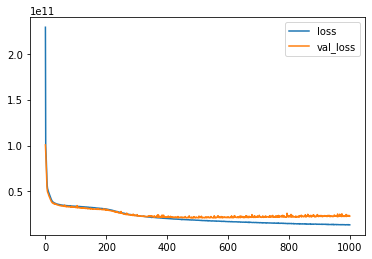

In [72]:
loss = pd.DataFrame(model_f.history.history)
loss.plot()

In [73]:
test_pred_f = model_f.predict(X_test) 
r2_score(y_test,test_pred_f)

0.8161845862748505

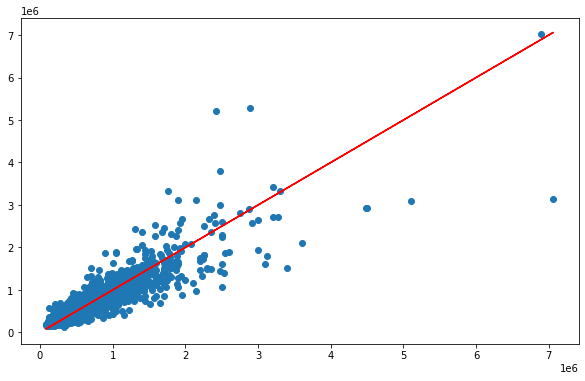

In [74]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_test, test_pred_f)
ax.plot(y_test,y_test,'r')

Our r square score is the highest, butthe loss plot seems like we have a overfitting. Lets zoom into epoch 300 to 500, where overfitting seems to happen.

<AxesSubplot:>

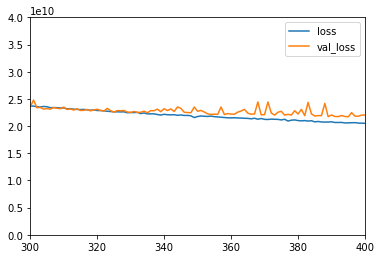

In [78]:
loss.plot(xlim=(300,400),ylim=(0, 0.4e11))

<AxesSubplot:>

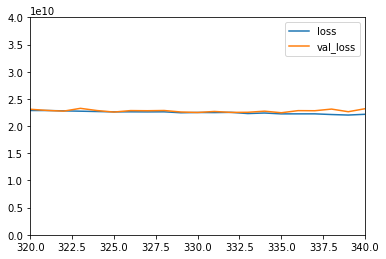

In [79]:
loss.plot(xlim=(320,340),ylim=(0, 0.4e11))

From epoch 335, the overfitting starts, so we will reduce epoch to 335 and rerun the model.

In [84]:
model_f = Sequential()
model_f.add(Input(shape = (16,))) 
model_f.add(Dense(50, activation = 'relu'))
model_f.add(Dense(50, activation = 'relu'))
model_f.add(Dense(50, activation = 'relu'))
model_f.add(Dense(1))             
model_f.compile(optimizer='adam',loss='mean_squared_error')
model_f.fit(X_train, y_train.values,
          validation_data=(X_val,y_val.values),
          epochs=335, batch_size=10)

Epoch 1/335
1134/1134 [==============================] - 1s 768us/step - loss: 241394270208.0000 - val_loss: 101067120640.0000
Epoch 2/335
1134/1134 [==============================] - 1s 694us/step - loss: 100701061120.0000 - val_loss: 93480812544.0000
Epoch 3/335
1134/1134 [==============================] - 1s 682us/step - loss: 92689686528.0000 - val_loss: 85215985664.0000
Epoch 4/335
1134/1134 [==============================] - 1s 679us/step - loss: 83855736832.0000 - val_loss: 75434442752.0000
Epoch 5/335
1134/1134 [==============================] - 1s 677us/step - loss: 73892315136.0000 - val_loss: 65319710720.0000
Epoch 6/335
1134/1134 [==============================] - 1s 679us/step - loss: 64008626176.0000 - val_loss: 56546717696.0000
Epoch 7/335
1134/1134 [==============================] - 1s 682us/step - loss: 57070096384.0000 - val_loss: 51485331456.0000
Epoch 8/335
1134/1134 [==============================] - 1s 715us/step - loss: 53430079488.0000 - val_loss: 49230106624.00

1134/1134 [==============================] - 1s 676us/step - loss: 34859171840.0000 - val_loss: 33932058624.0000
Epoch 67/335
1134/1134 [==============================] - 1s 687us/step - loss: 34903781376.0000 - val_loss: 33990541312.0000
Epoch 68/335
1134/1134 [==============================] - 1s 679us/step - loss: 34930180096.0000 - val_loss: 34101698560.0000
Epoch 69/335
1134/1134 [==============================] - 1s 677us/step - loss: 34816729088.0000 - val_loss: 33796927488.0000
Epoch 70/335
1134/1134 [==============================] - 1s 677us/step - loss: 34837422080.0000 - val_loss: 33977145344.0000
Epoch 71/335
1134/1134 [==============================] - 1s 673us/step - loss: 34809253888.0000 - val_loss: 33860149248.0000
Epoch 72/335
1134/1134 [==============================] - 1s 673us/step - loss: 34705731584.0000 - val_loss: 33845385216.0000
Epoch 73/335
1134/1134 [==============================] - 1s 686us/step - loss: 34744487936.0000 - val_loss: 34678194176.0000
Epoch

Epoch 131/335
1134/1134 [==============================] - 1s 678us/step - loss: 33368049664.0000 - val_loss: 32495368192.0000
Epoch 132/335
1134/1134 [==============================] - 1s 683us/step - loss: 33331124224.0000 - val_loss: 32015591424.0000
Epoch 133/335
1134/1134 [==============================] - 1s 688us/step - loss: 33318467584.0000 - val_loss: 32148084736.0000
Epoch 134/335
1134/1134 [==============================] - 1s 682us/step - loss: 33279139840.0000 - val_loss: 31944228864.0000
Epoch 135/335
1134/1134 [==============================] - 1s 677us/step - loss: 33179383808.0000 - val_loss: 33507463168.0000
Epoch 136/335
1134/1134 [==============================] - 1s 677us/step - loss: 33304909824.0000 - val_loss: 31919931392.0000
Epoch 137/335
1134/1134 [==============================] - 1s 675us/step - loss: 33182388224.0000 - val_loss: 33054179328.0000
Epoch 138/335
1134/1134 [==============================] - 1s 675us/step - loss: 33260414976.0000 - val_loss: 3

1134/1134 [==============================] - 1s 688us/step - loss: 31758256128.0000 - val_loss: 30545301504.0000
Epoch 196/335
1134/1134 [==============================] - 1s 720us/step - loss: 31684970496.0000 - val_loss: 30490777600.0000
Epoch 197/335
1134/1134 [==============================] - 1s 691us/step - loss: 31577020416.0000 - val_loss: 30408308736.0000
Epoch 198/335
1134/1134 [==============================] - 1s 695us/step - loss: 31641710592.0000 - val_loss: 30377613312.0000
Epoch 199/335
1134/1134 [==============================] - 1s 685us/step - loss: 31450447872.0000 - val_loss: 30261944320.0000
Epoch 200/335
1134/1134 [==============================] - 1s 680us/step - loss: 31466811392.0000 - val_loss: 30319994880.0000
Epoch 201/335
1134/1134 [==============================] - 1s 683us/step - loss: 31463399424.0000 - val_loss: 30301409280.0000
Epoch 202/335
1134/1134 [==============================] - 1s 681us/step - loss: 31271993344.0000 - val_loss: 30370639872.000

1134/1134 [==============================] - 1s 671us/step - loss: 25641969664.0000 - val_loss: 24971102208.0000
Epoch 260/335
1134/1134 [==============================] - 1s 673us/step - loss: 25665505280.0000 - val_loss: 25422686208.0000
Epoch 261/335
1134/1134 [==============================] - 1s 677us/step - loss: 25612986368.0000 - val_loss: 24714029056.0000
Epoch 262/335
1134/1134 [==============================] - 1s 683us/step - loss: 25411002368.0000 - val_loss: 25176643584.0000
Epoch 263/335
1134/1134 [==============================] - 1s 677us/step - loss: 25318010880.0000 - val_loss: 24634775552.0000
Epoch 264/335
1134/1134 [==============================] - 1s 686us/step - loss: 25303046144.0000 - val_loss: 24503068672.0000
Epoch 265/335
1134/1134 [==============================] - 1s 673us/step - loss: 25224390656.0000 - val_loss: 24659750912.0000
Epoch 266/335
1134/1134 [==============================] - 1s 680us/step - loss: 25050314752.0000 - val_loss: 24468592640.000

1134/1134 [==============================] - 1s 681us/step - loss: 21972473856.0000 - val_loss: 23050694656.0000
Epoch 324/335
1134/1134 [==============================] - 1s 676us/step - loss: 21984512000.0000 - val_loss: 23766394880.0000
Epoch 325/335
1134/1134 [==============================] - 1s 680us/step - loss: 21928165376.0000 - val_loss: 23390255104.0000
Epoch 326/335
1134/1134 [==============================] - 1s 675us/step - loss: 22030462976.0000 - val_loss: 22669590528.0000
Epoch 327/335
1134/1134 [==============================] - 1s 681us/step - loss: 21892900864.0000 - val_loss: 22889060352.0000
Epoch 328/335
1134/1134 [==============================] - 1s 694us/step - loss: 21947015168.0000 - val_loss: 22960898048.0000
Epoch 329/335
1134/1134 [==============================] - 1s 713us/step - loss: 21756391424.0000 - val_loss: 23628718080.0000
Epoch 330/335
1134/1134 [==============================] - 1s 690us/step - loss: 21807476736.0000 - val_loss: 22745905152.000

<AxesSubplot:>

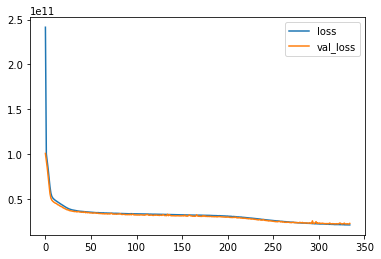

In [85]:
loss = pd.DataFrame(model_f.history.history)
loss.plot()

In [86]:
test_pred_f = model_f.predict(X_test) 
r2_score(y_test,test_pred_f)

0.8055630231413347

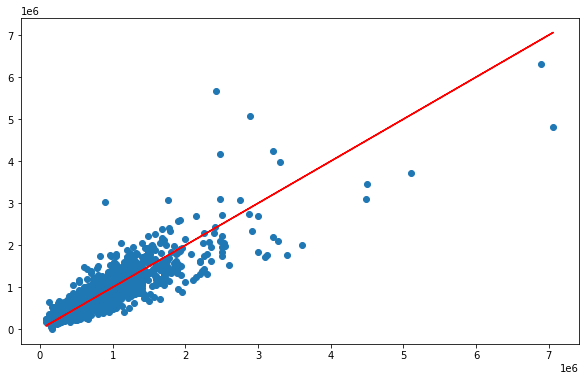

In [87]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_test, test_pred_f)
ax.plot(y_test,y_test,'r')

Good! Our final model does not seem to overfit and maintained r square score of 0.8